# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multiplatform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via `gnuplot` from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you desire.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like `ggplot` and `ggvis` in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [`ggpy`](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

# General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

## Importing Matplotlib

Just as we use the `np` shorthand for NumPy and the `pd` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often, as you shall see throughout this part of the book.

## Setting Styles

We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures.
Here we will set the `classic` style, which ensures that the plots we create use the classic Matplotlib style:

In [2]:
plt.style.use('classic')

Throughout this chapter, we will adjust this style as needed.
For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb).

## show or No show? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in a Jupyter notebook.

### Plotting from a Script

If you are using Matplotlib from within a script, the function `plt.show` is your friend.
`plt.show` starts an event loop, looks for all currently active `Figure` objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# file: myplot.py 
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The `plt.show` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but Matplotlib does its best to hide all these details from you.

One thing to be aware of: the `plt.show` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple `show` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

### Plotting from an IPython Shell

Matplotlib also works seamlessly within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the `%matplotlib` magic command after starting `ipython`:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any `plt` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use `plt.draw`.
Using `plt.show` in IPython's Matplotlib mode is not required.

### Plotting from a Jupyter Notebook

The Jupyter notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within a Jupyter notebook can be done with the `%matplotlib` command, and works in a similar way to the IPython shell.
You also have the option of embedding graphics directly in the notebook, with two possible options:

- `%matplotlib inline` will lead to *static* images of your plot embedded in the notebook.
- `%matplotlib notebook` will lead to *interactive* plots embedded within the notebook.

For this book, we will generally stick with the default, with figures rendered as static images (see the following figure for the result of this basic plotting example):

In [3]:
%matplotlib inline

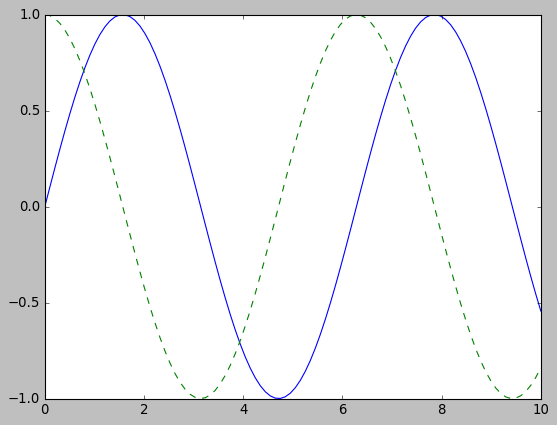

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the `savefig` command.
For example, to save the previous figure as a PNG file, we can run this:

In [5]:
fig.savefig('my_figure.png')

We now have a file called *my_figure.png* in the current working directory:

In [6]:
!ls -lh my_figure.png

-rw-r--r--  1 jimp  staff    38K Jun  8 17:05 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython `Image` object to display the contents of this file (see the following figure):

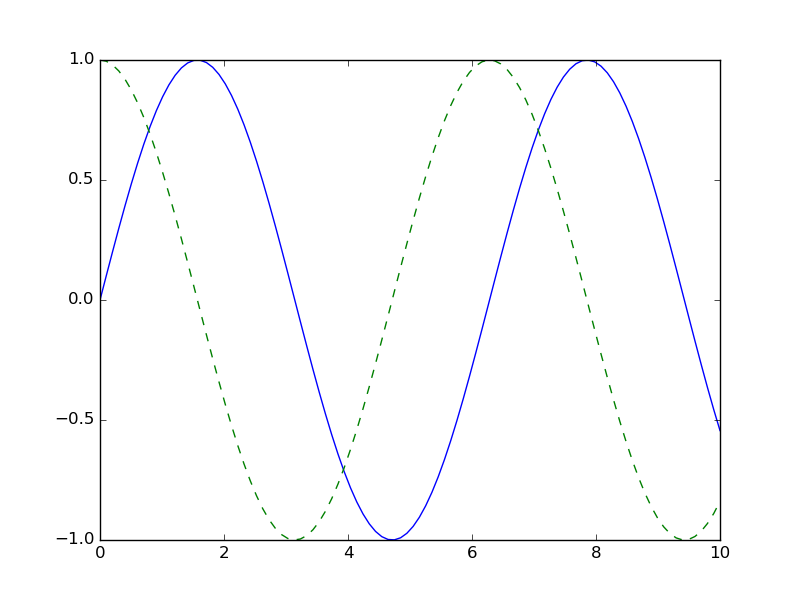

In [7]:
from IPython.display import Image
Image('my_figure.png')

In `savefig`, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Note that when saving your figure, it is not necessary to use `plt.show` or related commands discussed earlier.

### Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. I'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally conceived as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the `pyplot` (`plt`) interface.
For example, the following code will probably look quite familiar to MATLAB users (the following figure shows the result):

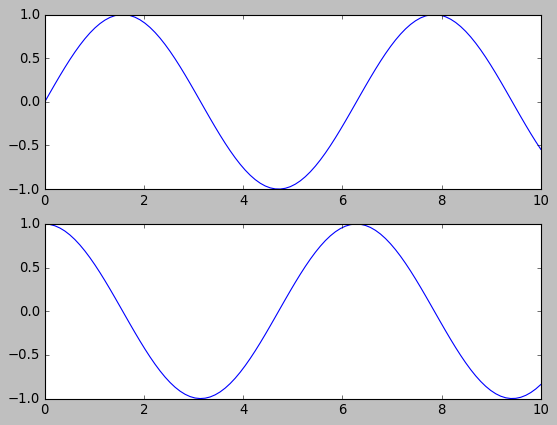

In [9]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to recognize that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied.
You can get a reference to these using the `plt.gcf` (get current figure) and `plt.gca` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit `Figure` and `Axes` objects.
To re-create the previous plot using this style of plotting, as shown in the following figure, you might do the following:

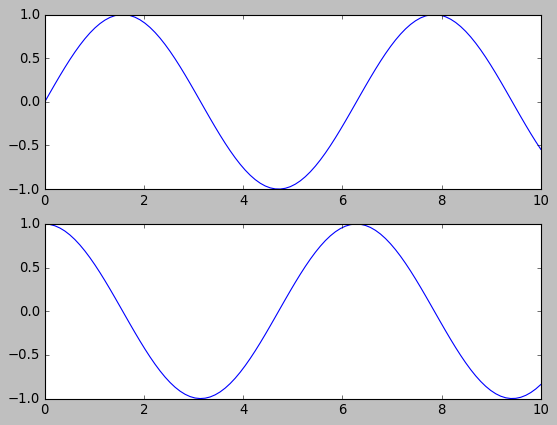

In [10]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For simpler plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout the following chapters, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching `plt.plot` to `ax.plot`, but there are a few gotchas that I will highlight as they come up in the following chapters.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As in all the following chapters, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


For all Matplotlib plots, we start by creating a figure and axes.
In their simplest form, this can be done as follows (see the following figure):

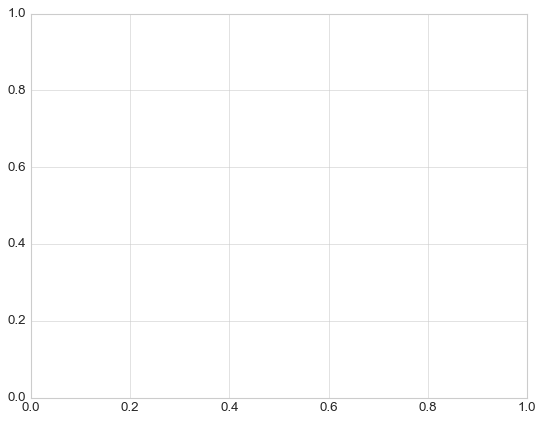

In [12]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this part of the book, I'll commonly use the variable name `fig` to refer to a figure instance and `ax` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the `ax.plot` method to plot some data. Let's start with a simple sinusoid, as shown in the following figure:

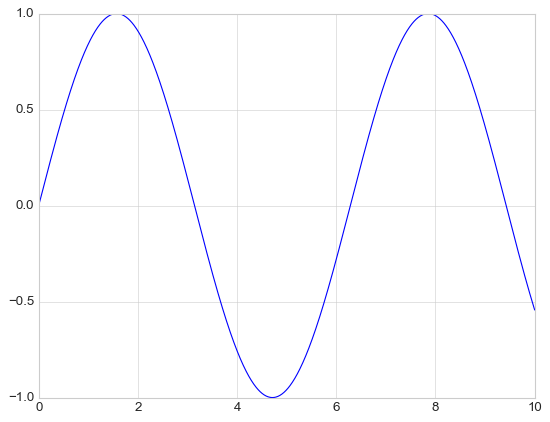

In [13]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Note that the semicolon at the end of the last line is intentional: it suppresses the textual representation of the plot from the output.

Alternatively, we can use the PyLab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces); as the following figure shows, the result is the same:

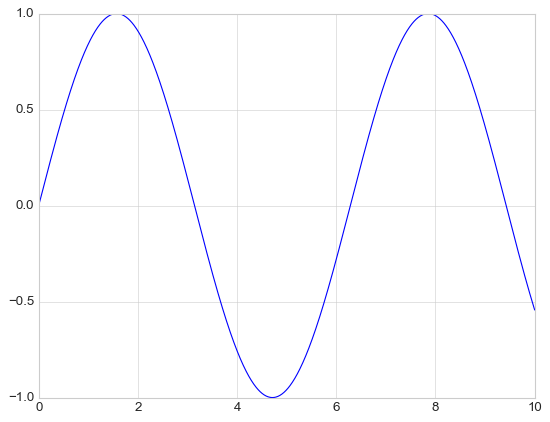

In [14]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines (see the following figure), we can simply call the `plot` function multiple times:

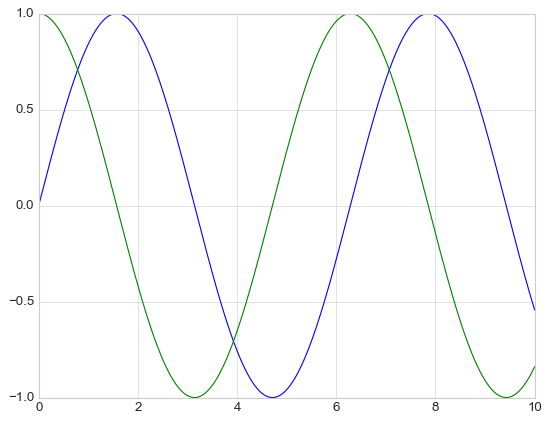

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The `plt.plot` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways; see the following figure for the output of the following examples:

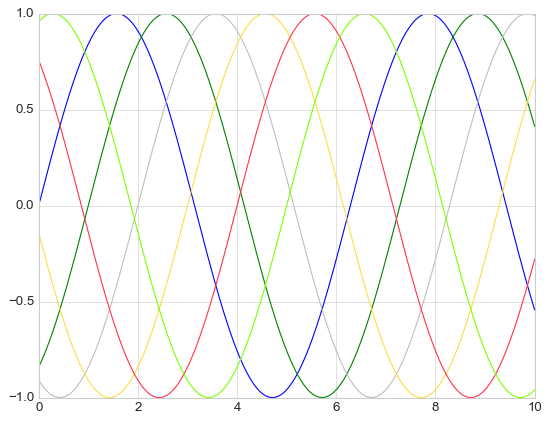

In [16]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the `linestyle` keyword (see the following figure):

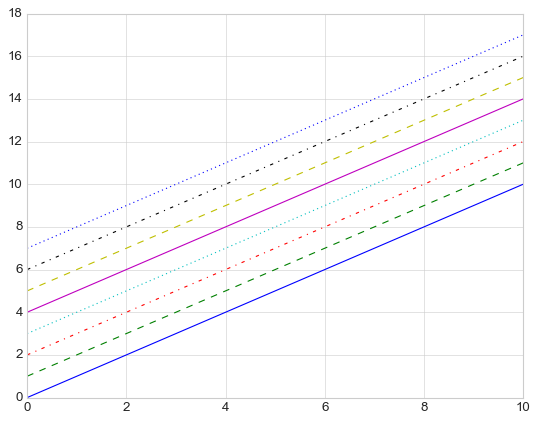

In [17]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Though it may be less clear to someone reading your code, you can save some keystrokes by combining these `linestyle` and `color` codes into a single non-keyword argument to the `plt.plot` function; the following figure shows the result:

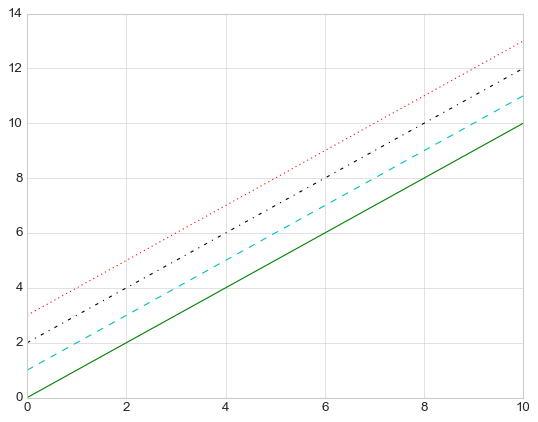

In [18]:
plt.plot(x, x + 0, '-g')   # solid green
plt.plot(x, x + 1, '--c')  # dashed cyan
plt.plot(x, x + 2, '-.k')  # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for details, read through the docstring of the `plt.plot` function using IPython's help tools (see [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust the limits is to use the `plt.xlim` and `plt.ylim` functions (see the following figure):

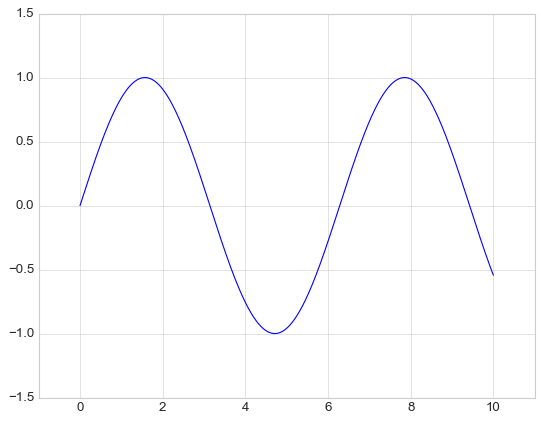

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments (see the following figure):

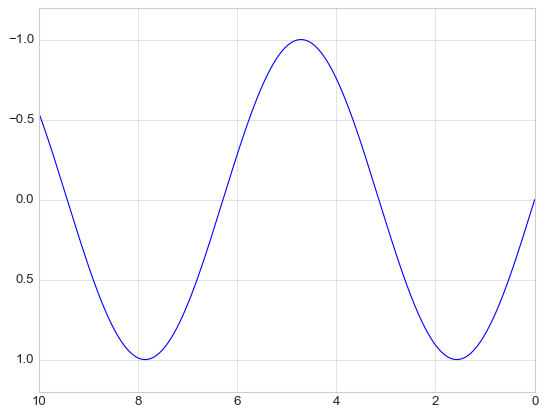

In [20]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is `plt.axis` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*), which allows more qualitative specifications of axis limits. For example, you can automatically tighten the bounds around the current content, as shown in the following figure:

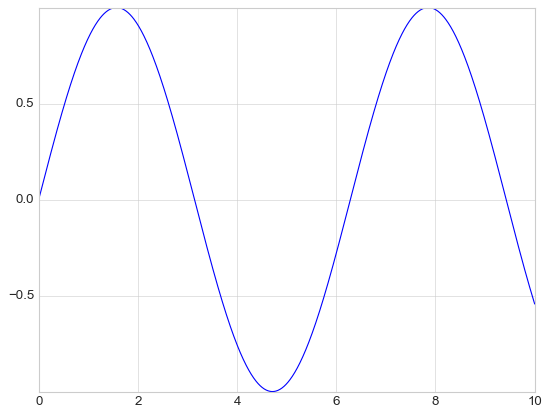

In [21]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Or you can specify that you want an equal axis ratio, such that one unit in `x` is visually equivalent to one unit in `y`, as seen in the following figure:

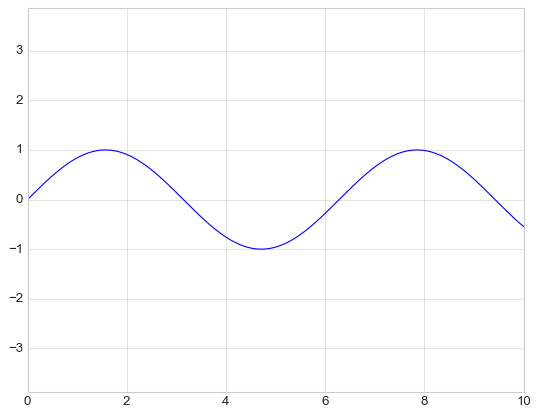

In [22]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Other axis options include `'on'`, `'off'`, `'square'`, `'image'`, and more. For more information on these, refer to the `plt.axis` docstring.

## Labeling Plots

As the last piece of this chapter, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.
Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them (see the following figure):

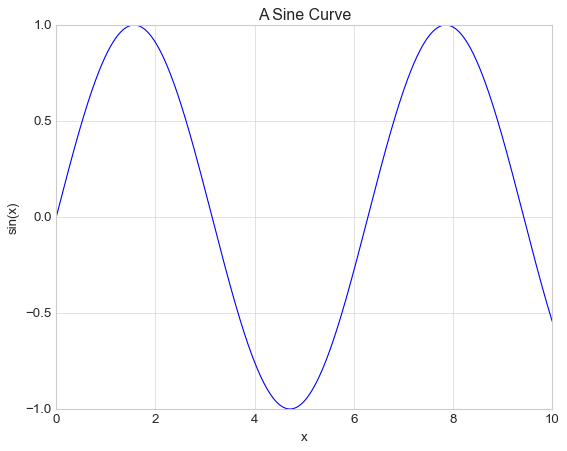

In [23]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the functions, described in the docstrings.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend; it is done via the (you guessed it) `plt.legend` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the `label` keyword of the `plot` function (see the following figure):

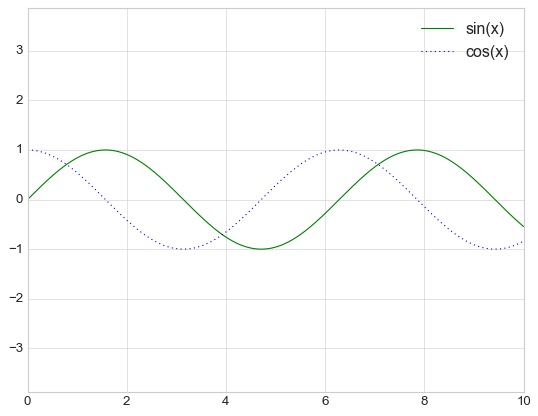

In [24]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the `plt.legend` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the `plt.legend` docstring; additionally, we will cover some more advanced legend options in [Customizing Plot Legends](04.06-Customizing-Legends.ipynb).

## Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods (`plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel`  → `ax.set_xlabel`
- `plt.ylabel` → `ax.set_ylabel`
- `plt.xlim`  → `ax.set_xlim`
- `plt.ylim` → `ax.set_ylim`
- `plt.title` → `ax.set_title`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once (see the following figure):

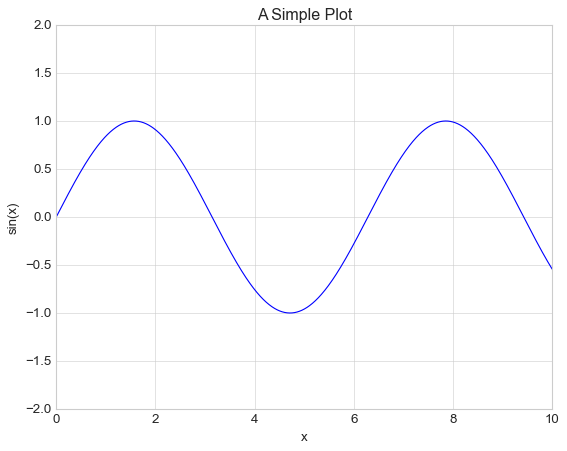

In [25]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the packages we will use:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Scatter Plots with plt.plot

In the previous chapter we looked at using `plt.plot`/`ax.plot` to produce line plots.
It turns out that this same function can produce scatter plots as well (see the following figure):

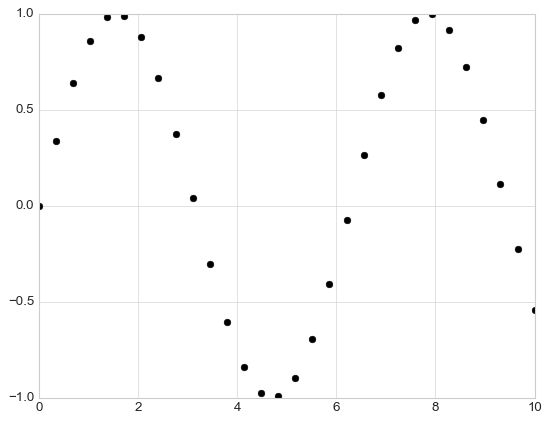

In [27]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as `'-'` or `'--'` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of `plt.plot`, or in Matplotlib's [online documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html). Most of the possibilities are fairly intuitive, and a number of the more common ones are demonstrated here (see the following figure):

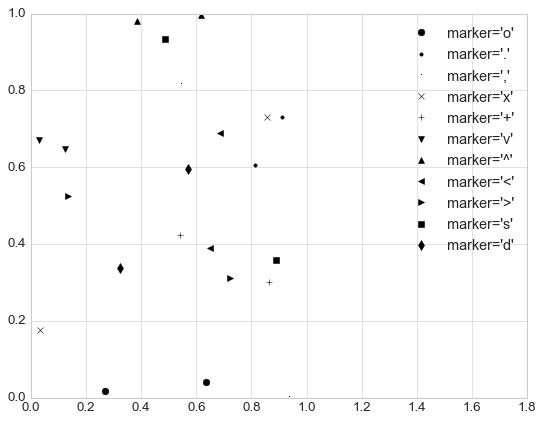

In [28]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them (see the following figure):

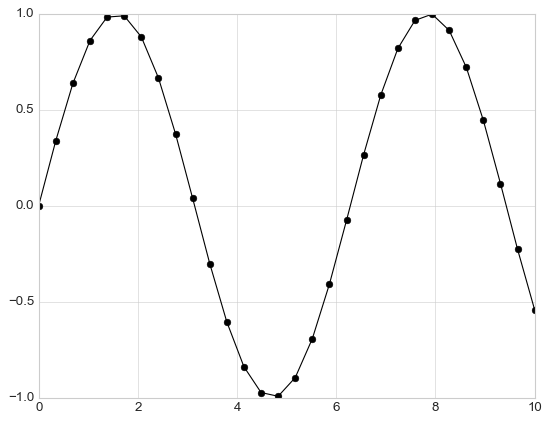

In [29]:
plt.plot(x, y, '-ok');

Additional keyword arguments to `plt.plot` specify a wide range of properties of the lines and markers, as you can see in the following figure:

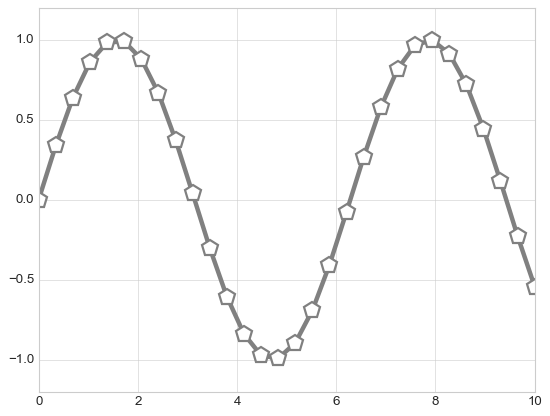

In [30]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

These kinds of options make `plt.plot` the primary workhorse for two-dimensional plots in Matplotlib.
For a full description of the options available, refer to the [`plt.plot` documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html).

## Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function (see the following figure):

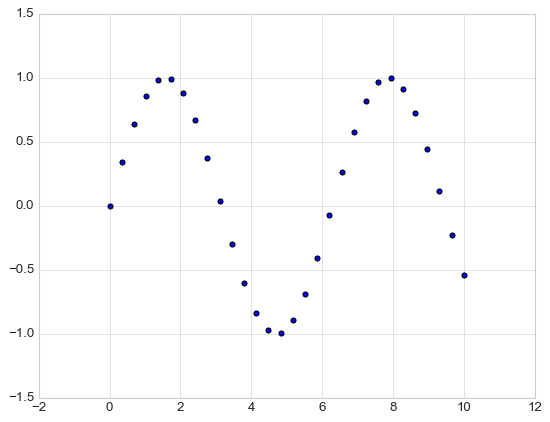

In [31]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the `alpha` keyword to adjust the transparency level (see the following figure):

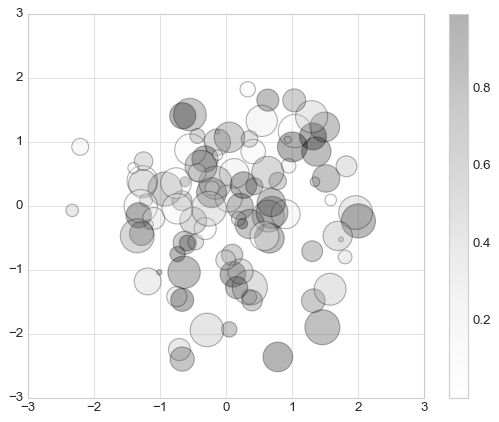

In [32]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the `colorbar` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris dataset from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured (see the following figure):

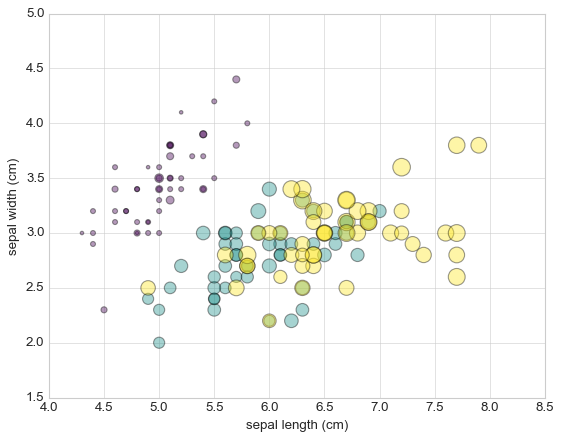

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

A full-color version of this plot is available in the [online version](http://github.com/jakevdp/PythonDataScienceHandbook) of the book.

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (*x*, *y*) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## plot Versus scatter: A Note on Efficiency

Aside from the different features available in `plt.plot` and `plt.scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`.
The reason is that `plt.scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
With `plt.plot`, on the other hand, the markers for each point are guaranteed to be identical, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, this difference can lead to vastly different performance, and for this reason, `plt.plot` should be preferred over `plt.scatter` for large datasets.

# Visualizing Uncertainties

For any scientific measurement, accurate accounting of uncertainties is nearly as important, if not more so, as accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 70 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of 70 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Basic Errorbars

One standard way to visualize uncertainties is using an errorbar. A basic errorbar can be created with a single Matplotlib function call, as shown in the following figure:

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


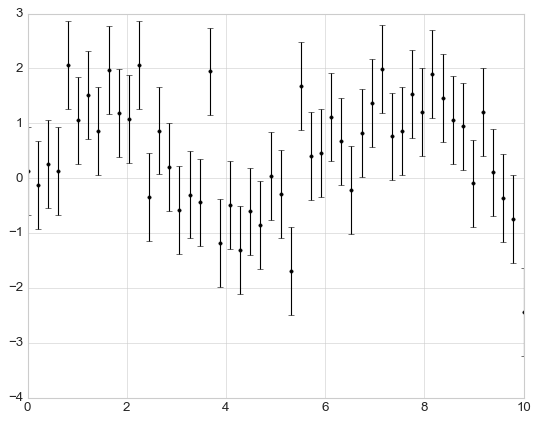

In [35]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and it has the same syntax as the shorthand used in `plt.plot`, outlined in the previous chapter and earlier in this chapter.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves (see the following figure):

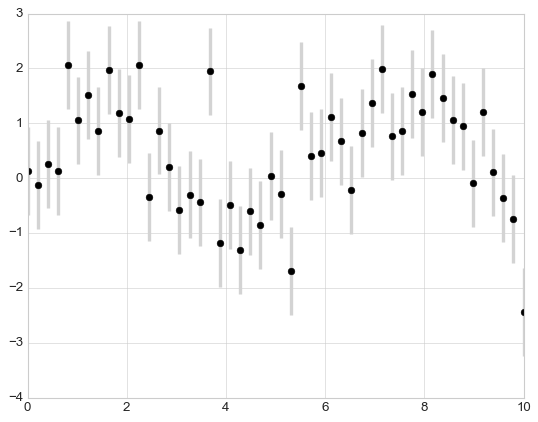

In [36]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars, one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of `plt.errorbar`.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible nonparametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

We now have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data.
We could pass these to the `plt.errorbar` function as in the previous section, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the `plt.fill_between` function with a light color to visualize this continuous error (see the following figure):

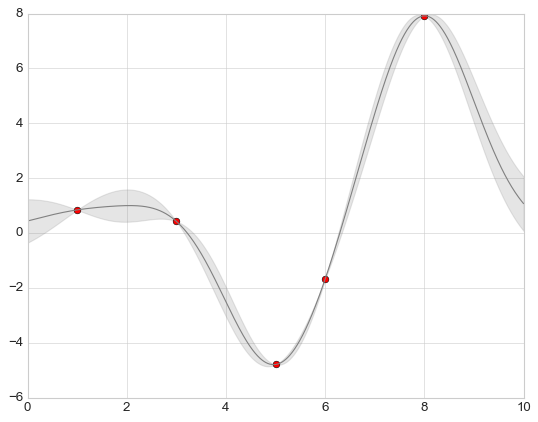

In [38]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Take a look at the `fill_between` call signature: we pass an x value, then the lower *y*-bound, then the upper *y*-bound, and the result is that the area between these regions is filled.

The resulting figure gives an intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained, and this is reflected in the small model uncertainties.
In regions far from a measured data point, the model is not strongly constrained, and the model uncertainties increase.

For more information on the options available in `plt.fill_between` (and the closely related `plt.fill` function), see the function docstring or the Matplotlib documentation.

Finally, if this seems a bit too low-level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images.
This chapter looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1072485847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Visualizing a Three-Dimensional Function

Our first example demonstrates a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

In [40]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [41]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot (see the following figure):

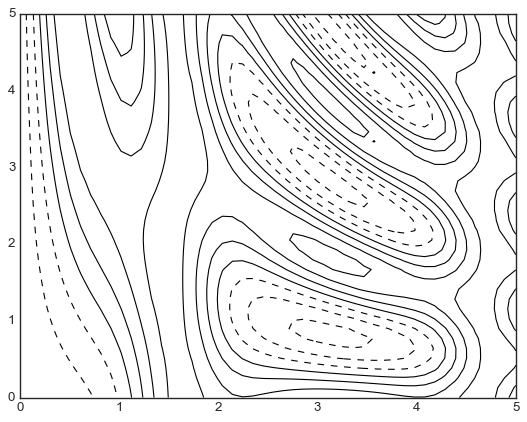

In [42]:
plt.contour(X, Y, Z, colors='black');

Notice that when a single color is used, negative values are represented by dashed lines and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the `cmap` argument.
Here we'll also specify that we want more lines to be drawn, at 20 equally spaced intervals within the data range, as shown in the following figure:

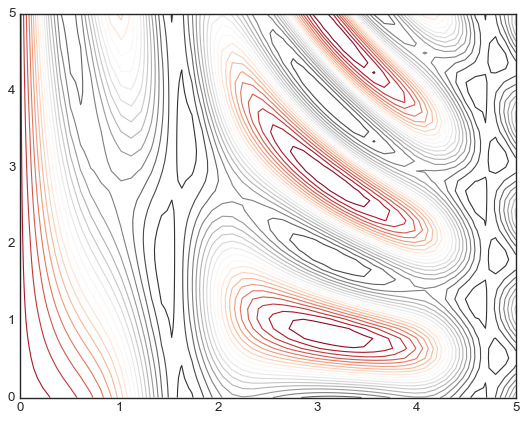

In [43]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the `RdGy` (short for *Red–Gray*) colormap, which is a good choice for divergent data: (i.e., data with positive and negative variation around zero).
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the `plt.cm` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the `plt.contourf` function, which uses largely the same syntax as `plt.contour`.

Additionally, we'll add a `plt.colorbar` command, which creates an additional axis with labeled color information for the plot (see the following figure):

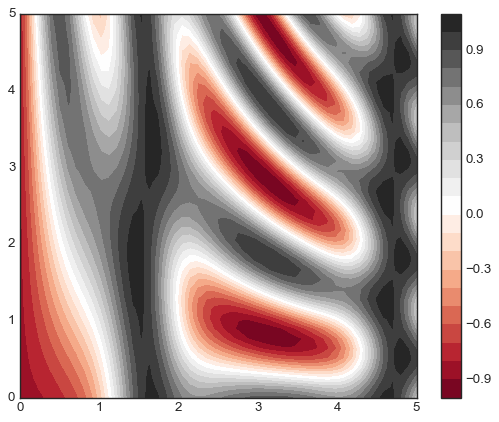

In [44]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit splotchy: the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to generate a smooth representation is to use the `plt.imshow` function, which offers the `interpolation` argument to generate a smooth two-dimensional representation of the data (see the following figure):

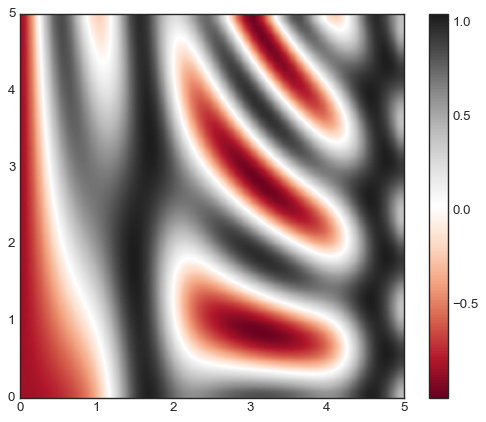

In [45]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

There are a few potential gotchas with `plt.imshow`, however:

- It doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- By default it follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- It will automatically adjust the axis aspect ratio to match the input data; this can be changed with the `aspect` argument.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the `alpha` parameter) and overplot contours with labels on the contours themselves, using the `plt.clabel` function (see the following figure):

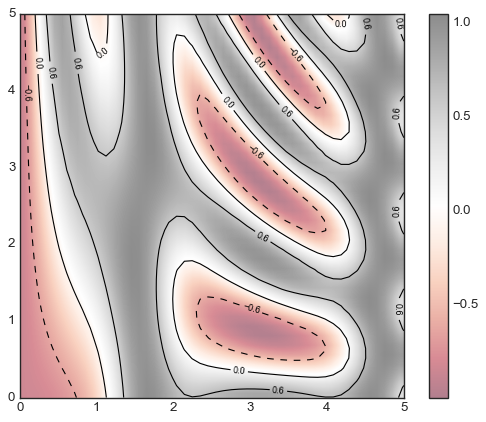

In [46]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—`plt.contour`, `plt.contourf`, and `plt.imshow`—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (discussed in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boilerplate imports are done (see the following figure):

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/4011635199.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


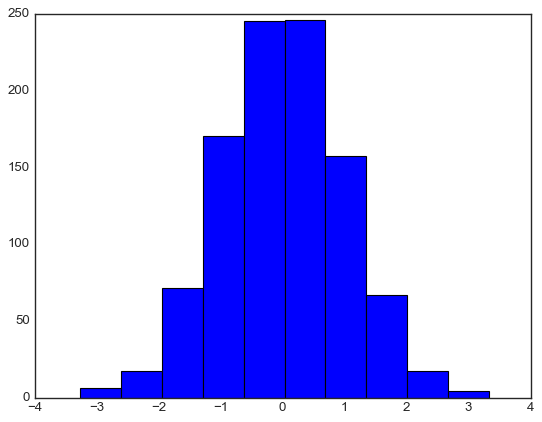

In [48]:
plt.hist(data);

The `hist` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram, shown in the following figure:

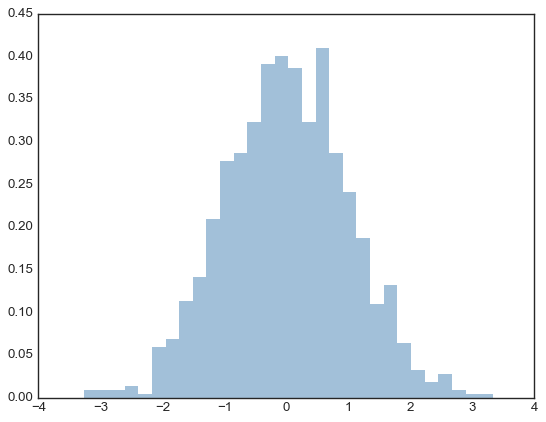

In [49]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The `plt.hist` docstring has more information on other available customization options.
I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be helpful when comparing histograms of several distributions (see the following figure):

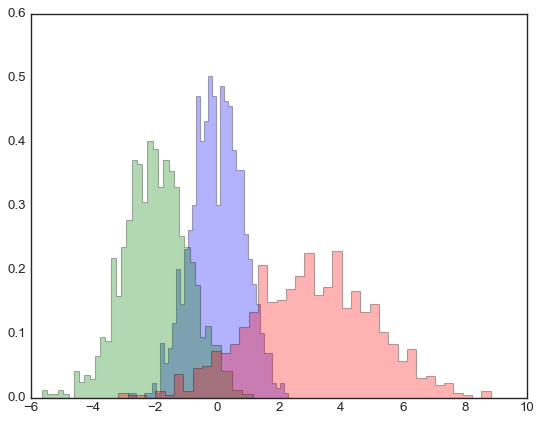

In [50]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you are interested in computing, but not displaying, the histogram (that is, counting the number of points in a given bin), you can use the `np.histogram` function:

In [51]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [52]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function (see the following figure):

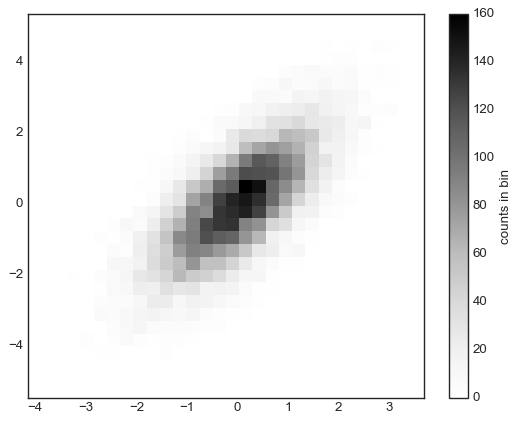

In [53]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

Just like `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`:

In [54]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


For the generalization of this histogram binning when there are more than two dimensions, see the `np.histogramdd` function.

### plt.hexbin: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the `plt.hexbin` routine, which represents a two-dimensional dataset binned within a grid of hexagons (see the following figure):

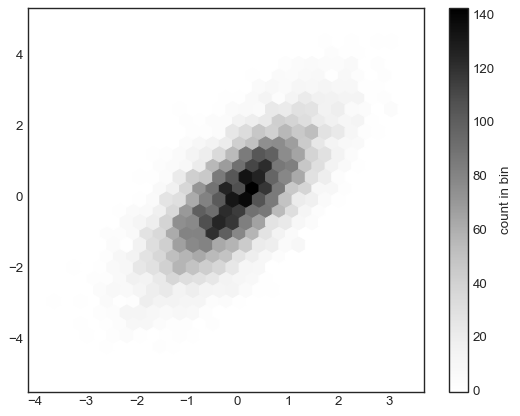

In [55]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of additional options, including the ability to specify weights for each point and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method for estimating and representing densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now I'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the `scipy.stats` package.
Here is a quick example of using KDE (see the following figure):

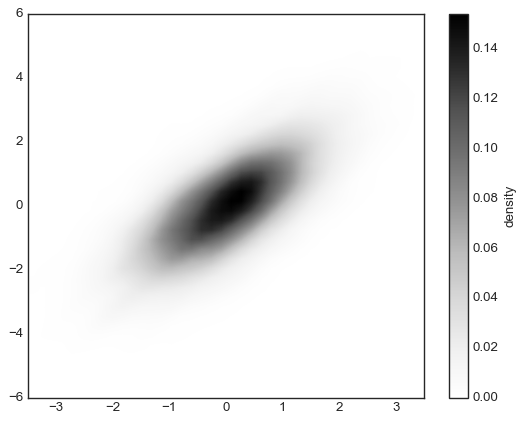

In [56]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast; `gaussian_kde` uses a rule of thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, `sklearn.neighbors.KernelDensity` and `statsmodels.nonparametric.KDEMultivariate`.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more compact API for creating KDE-based visualizations.

# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `plt.legend` command, which automatically creates a legend for any labeled plot elements (see the following figure):

In [57]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/364958460.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [58]:
%matplotlib inline
import numpy as np

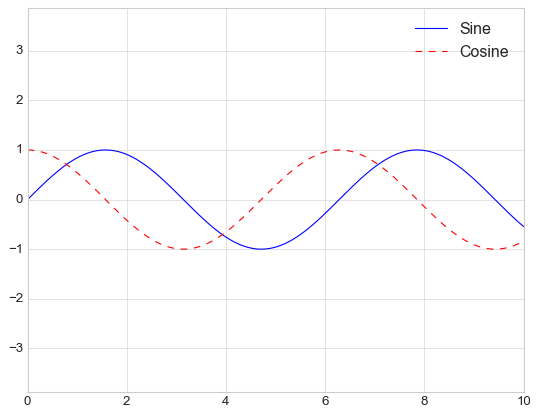

In [59]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn on the frame (see the following figure):

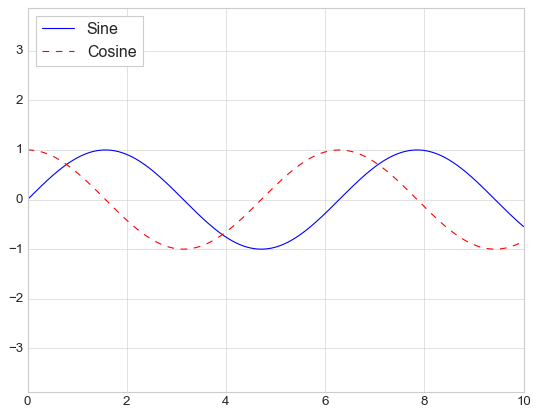

In [60]:
ax.legend(loc='upper left', frameon=True)
fig

We can use the ``ncol`` command to specify the number of columns in the legend, as shown in the following figure:

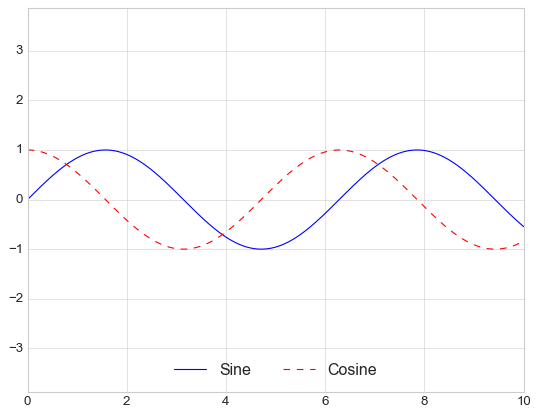

In [61]:
ax.legend(loc='lower center', ncol=2)
fig

And we can use a rounded box (`fancybox`) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text (see the following figure):

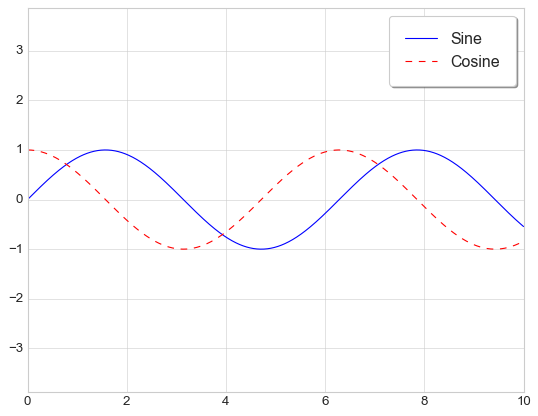

In [62]:
ax.legend(frameon=True, fancybox=True, framealpha=1,
          shadow=True, borderpad=1)
fig

For more information on available legend options, see the `plt.legend` docstring.

## Choosing Elements for the Legend

As we have already seen, by default the legend includes all labeled elements from the plot.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by `plot` commands.
`plt.plot` is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to `plt.legend` will tell it which to identify, along with the labels we'd like to specify (see the following figure):

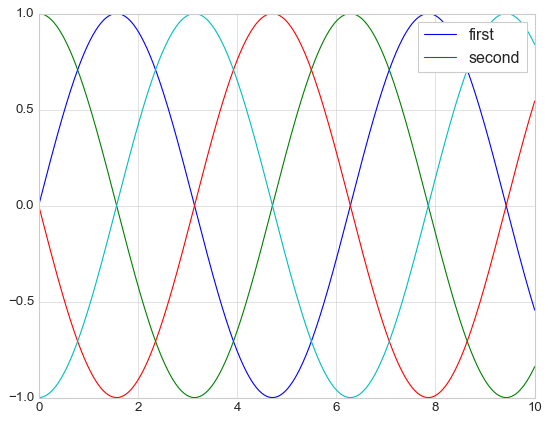

In [63]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend (see the following figure):

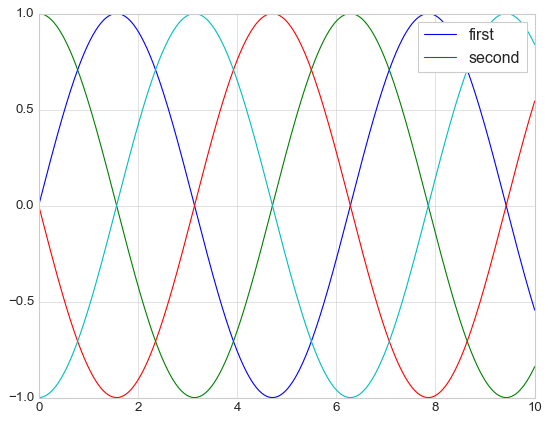

In [64]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True);

Notice that the legend ignores all elements without a `label` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries (see the following figure):

In [65]:
# Uncomment to download the data
# url = ('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
#        'master/notebooks/data/california_cities.csv')
# !cd data && curl -O {url}

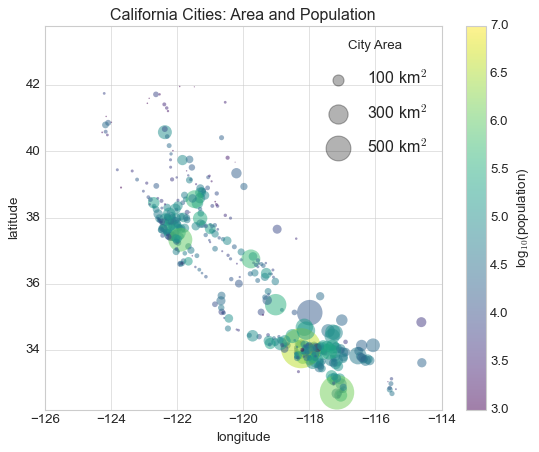

In [67]:
import pandas as pd
cities = pd.read_csv('./data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Recall that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects that are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard `legend` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using `plt.legend` or `ax.legend`, it will simply override the first one.
We can work around this by creating a new legend artist from scratch (`Artist` is the base class Matplotlib uses for visual attributes), and then using the lower-level `ax.add_artist` method to manually add the second artist to the plot (see the following figure):

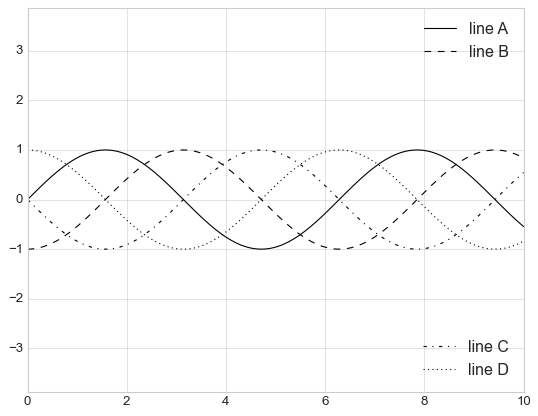

In [68]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of `ax.legend` (recall that you can do this with within the Jupyter notebook using `ax.legend??`) you'll see that the function simply consists of some logic to create a suitable `Legend` artist, which is then saved in the `legend_` attribute and added to the figure when the plot is drawn.

# Customizing Colorbars

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is drawn as a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black and white, this chapter has an accompanying [online supplement](https://github.com/jakevdp/PythonDataScienceHandbook) where you can view the figures in full color.
We'll start by setting up the notebook for plotting and importing the functions we will use:

In [69]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/3276517283.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [70]:
%matplotlib inline
import numpy as np

As we have seen several times already, the simplest colorbar can be created with the `plt.colorbar` function (see the following figure):

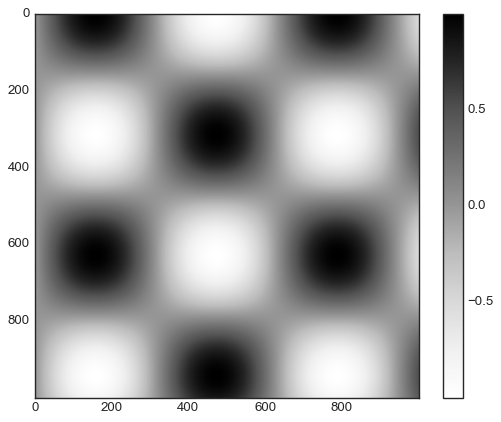

In [71]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization (see the following figure):

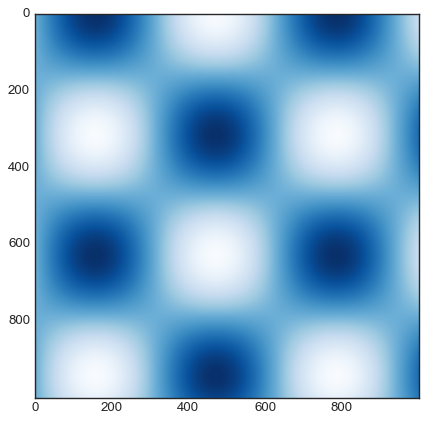

In [72]:
plt.imshow(I, cmap='Blues');

The names of available colormaps are in the `plt.cm` namespace; using IPython's tab completion feature will give you a full list of built-in possibilities:

```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

### Choosing the Colormap

A full treatment of color choice within visualizations is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) by Nicholas Rougier, Michael Droettboom, and Philip Bourne.
Matplotlib's online documentation also has an [interesting discussion](https://matplotlib.org/stable/tutorials/colors/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).
- *Qualitative colormaps*: These mix colors with no particular sequence (e.g., `rainbow` or `jet`).

The `jet` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the `jet` colorbar into black and white (see the following figure):

In [73]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


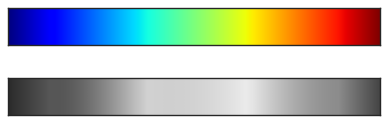

In [74]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as `viridis` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range; thus, it not only plays well with our color perception, but also will translate well to grayscale printing (see the following figure):

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


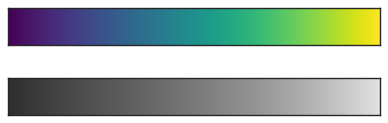

In [75]:
view_colormap('viridis')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as `RdBu` (*Red–Blue*) are helpful. However, as you can see in the following figure, it's important to note that the positive/negative information will be lost upon translation to grayscale!

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1598486860.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


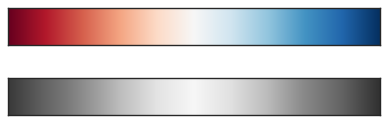

In [76]:
view_colormap('RdBu')

We'll see examples of using some of these colormaps as we continue.

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the `plt.cm` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

### Color Limits and Extensions

Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of `plt.Axes`, so all of the axes and tick formatting tricks we've seen so far are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property.
This might come in handy, for example, if displaying an image that is subject to noise (see the following figure):

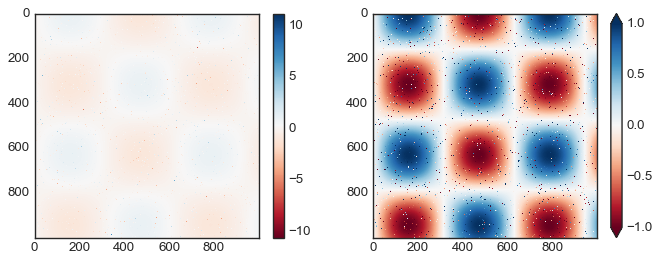

In [77]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes out the pattern we are interested in.
In the right panel, we manually set the color limits and add extensions to indicate values that are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Colorbars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the `plt.cm.get_cmap` function and pass the name of a suitable colormap along with the number of desired bins (see the following figure):

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/3119515715.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


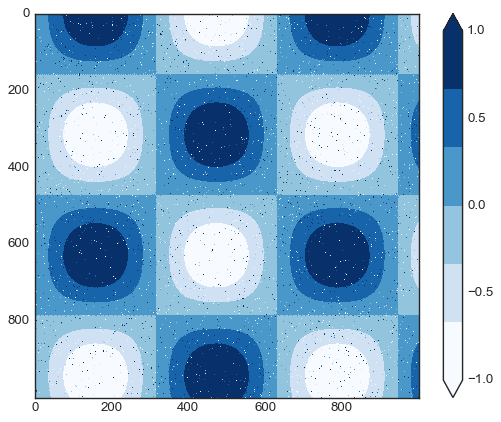

In [78]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1);

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

As an example of where this can be applied, let's look at an interesting visualization of some handwritten digits from the digits dataset, included in Scikit-Learn; it consists of nearly 2,000 $8 \times 8$ thumbnails showing various handwritten digits.

For now, let's start by downloading the digits dataset and visualizing several of the example images with `plt.imshow` (see the following figure):

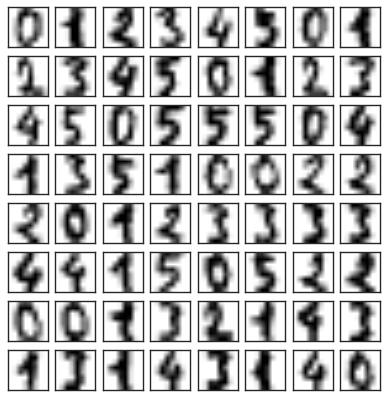

In [79]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
Visualizing such high-dimensional data can be difficult, but one way to approach this task is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.
Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of the digits data (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) for details):

In [80]:
# project the digits into 2 dimensions using Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

We'll use our discrete colormap to view the results, setting the `ticks` and `clim` to improve the aesthetics of the resulting colorbar (see the following figure):

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/2534648952.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))


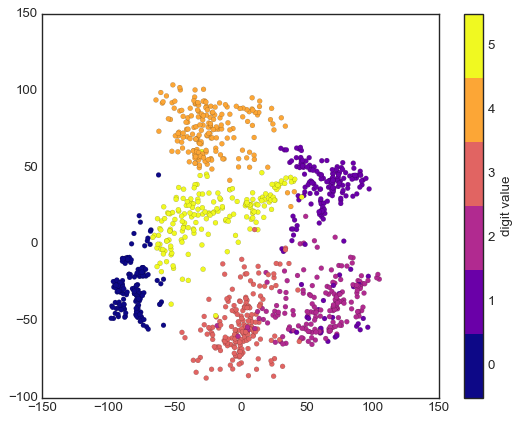

In [81]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some insights on the relationships within the dataset: for example, the ranges of 2 and 3 nearly overlap in this projection, indicating that some handwritten 2s and 3s are difficult to distinguish, and may be more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and may be less likely to be confused.

We'll return to manifold learning and digit classification in [Part 5](05.00-Machine-Learning.ipynb).

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this chapter we'll explore four routines for creating subplots in Matplotlib. We'll start by importing the packages we will use:

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1072485847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## plt.axes: Subplots by Hand

The most basic method of creating an axes is to use the `plt.axes` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
`plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system (`[left, bottom, width, height]`), which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure). The following figure shows the result:

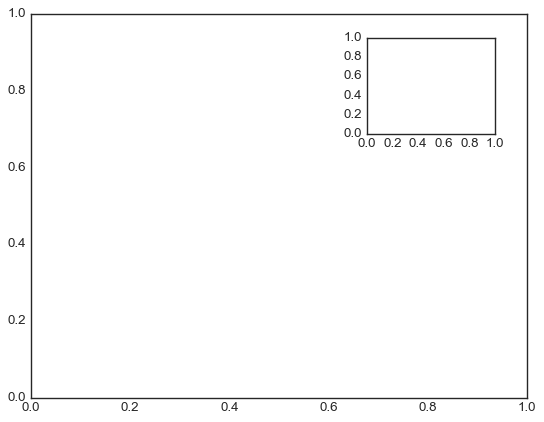

In [83]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes`. Let's use this to create two vertically stacked axes, as seen in the following figure:

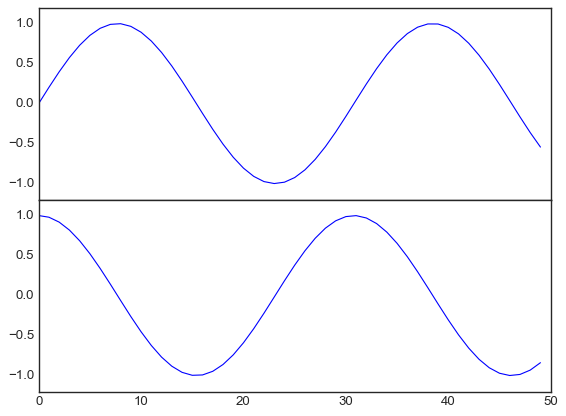

In [84]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## plt.subplot: Simple Grids of Subplots

Aligned columns or rows of subplots are a common enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is `plt.subplot`, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right (see the following figure):

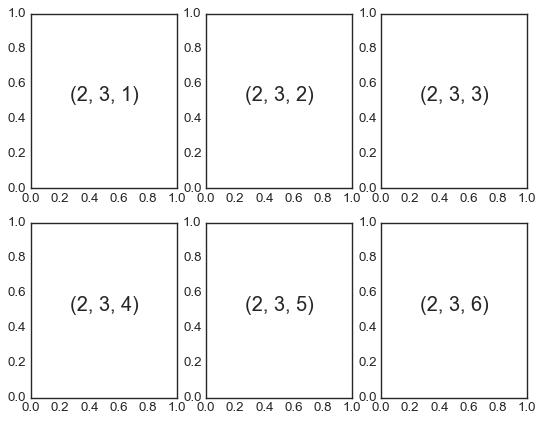

In [85]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, `fig.add_subplot`; the following figure shows the result:

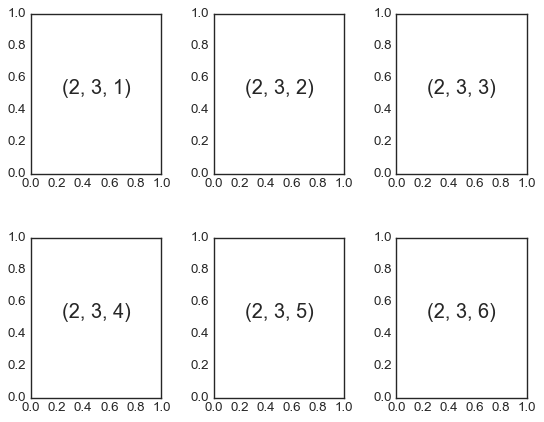

In [86]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Here we've used the `hspace` and `wspace` arguments of `plt.subplots_adjust`, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## plt.subplots: The Whole Grid in One Go

The approach just described quickly becomes tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, `plt.subplots` is the easier tool to use (note the `s` at the end of `subplots`). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Let's create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale (see the following figure):

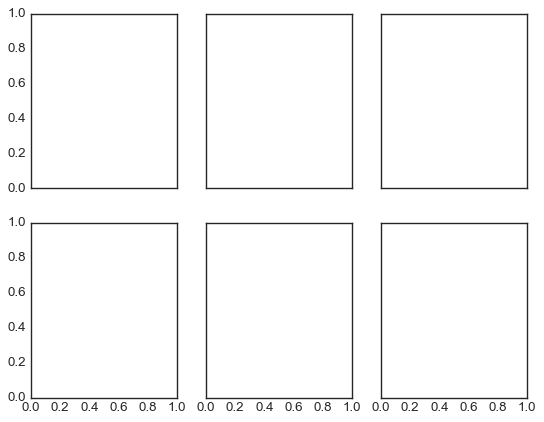

In [87]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

By specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation (see the following figure):

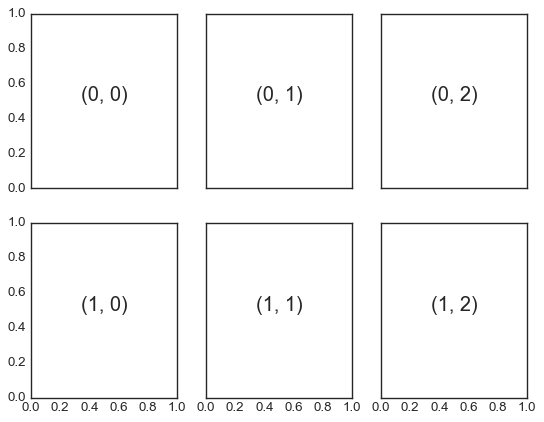

In [88]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to `plt.subplot`, `plt.subplots` is more consistent with Python's conventional zero-based indexing, whereas `plt.subplot` uses MATLAB-style one-based indexing.

## plt.GridSpec: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, `plt.GridSpec` is the best tool.
`plt.GridSpec` does not create a plot by itself; it is rather a convenient interface that is recognized by the `plt.subplot` command.
For example, a `GridSpec` for a grid of two rows and three columns with some specified width and height space looks like this:

In [89]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiar Python slicing syntax (see the following figure):

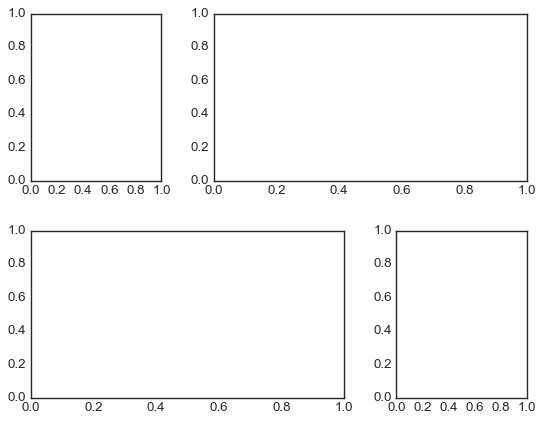

In [90]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multiaxes histogram plots like the ones shown in the following figure:

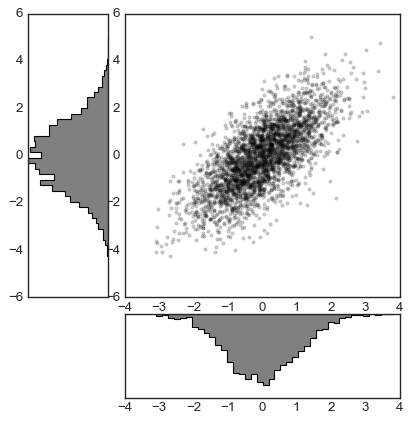

In [91]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package; see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb) for more details.

# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1908122744.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Example: Effect of Holidays on US Births

Let's return to some data we worked with earlier, in [Example: Birthrate Data](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year. We'll start with the same cleaning procedure we used there, and plot the results (see the following figure):

In [93]:
# shell command to download the data:
# !cd data && curl -O \
#   https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [95]:
from datetime import datetime

births = pd.read_csv('./data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

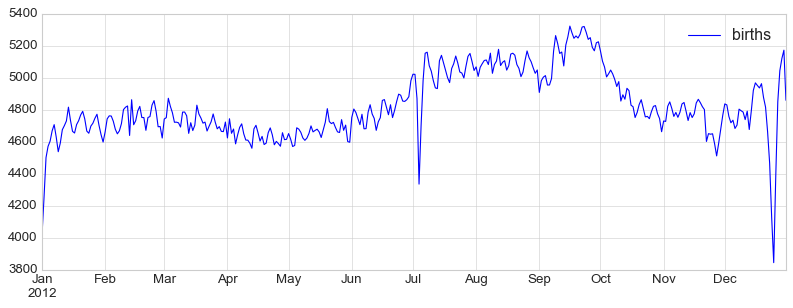

In [96]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're visualizing data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the `plt.text`/`ax.text` functions, which will place text at a particular *x*/*y* value (see the following figure):

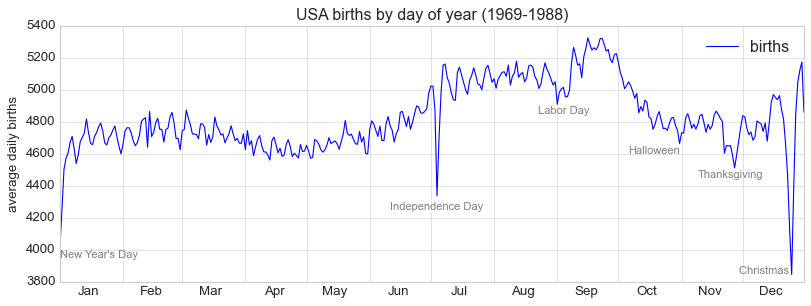

In [97]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The `ax.text` method takes an *x* position, a *y* position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used `ha='right'` and `ha='center'`, where `ha` is short for *horizontal alignment*.
See the docstrings of `plt.text` and `mpl.text.Text` for more information on the available options.

## Transforms and Text Position

In the previous example, we anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a fixed position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the *transform*.

Matplotlib makes use of a few different coordinate systems: a data point at $(x, y) = (1, 1)$ corresponds to a certain location on the axes or figure, which in turn corresponds to a particular pixel on the screen.
Mathematically, transforming between such coordinate systems is relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform these transforms (these tools can be explored in the `matplotlib.transforms` submodule).

A typical user rarely needs to worry about the details of the transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three predefined transforms that can be useful in this situation:

- `ax.transData`: Transform associated with data coordinates
- `ax.transAxes`: Transform associated with the axes (in units of axes dimensions)
- `fig.transFigure`: Transform associated with the figure (in units of figure dimensions)

Let's look at an example of drawing text at various locations using these transforms (see the following figure):

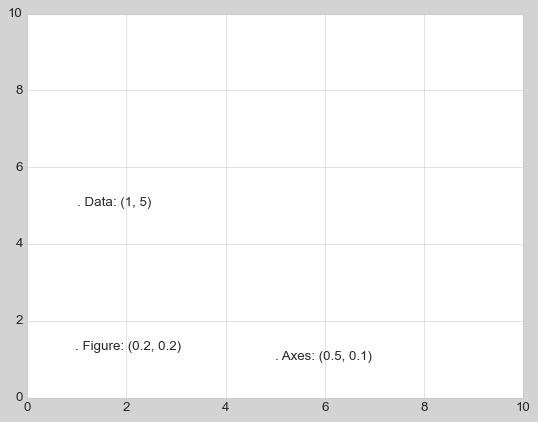

In [98]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Matplotlib's default text alignment is such that the "." at the beginning of each string will approximately mark the specified coordinate location.

The `transData` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The `transAxes` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the total axes size.
The `transFigure` coordinates are similar, but specify the position from the bottom-left corner of the figure (here the gray box) as a fraction of the total figure size.

Notice now that if we change the axes limits, it is only the `transData` coordinates that will be affected, while the others remain stationary (see the following figure):

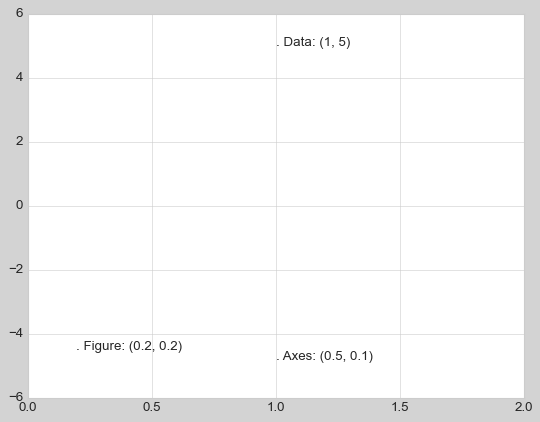

In [99]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

This behavior can be seen more clearly by changing the axes limits interactively: if you are executing this code in a notebook, you can make that happen by changing `%matplotlib inline` to `%matplotlib notebook` and using each plot's menu to interact with the plot.

## Arrows and Annotation

Along with tickmarks and text, another useful annotation mark is the simple arrow.

While there is a `plt.arrow` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, making it tricky to get them right.
Instead, I'd suggest using the `plt.annotate` function, which creates some text and an arrow and allows the arrows to be very flexibly specified.

Here is a demonstration of `annotate` with several of its options (see the following figure):

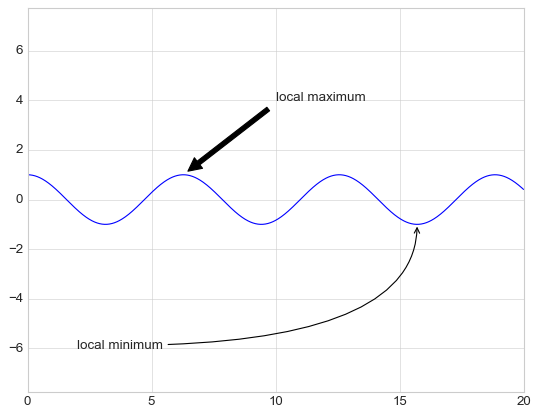

In [100]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the `arrowprops` dictionary, which has numerous options available.
These options are well documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to show some examples.
Let's demonstrate several of the possible options using the birthrate plot from before (see the following figure):

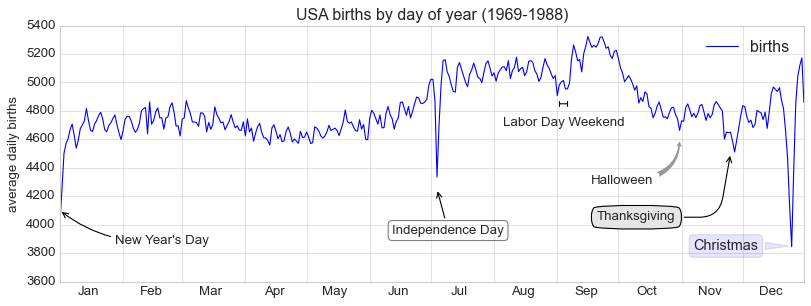

In [101]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day Weekend', xy=('2012-9-4', 4850), xycoords='data',
            ha='center', xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

The variety of options make `annotate` powerful and flexible: you can create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time-consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather is included as a demonstration of some of the available options.

More discussion and examples of available arrow and annotation styles can be found in the Matplotlib [Annotations tutorial](https://matplotlib.org/stable/tutorials/text/annotations.html).

# Customizing Ticks

Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This chapter will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Before we go into examples, however, let's talk a bit more about the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the `Figure` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of subobjects: for example, each `Figure` can contain one or more `Axes` objects, each of which in turn contains other objects representing plot contents.

The tickmarks are no exception. Each axes has attributes `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

## Major and Minor Ticks

Within each axes, there is the concept of a *major* tickmark, and a *minor* tickmark. As the names imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots (see the following figure):

In [102]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

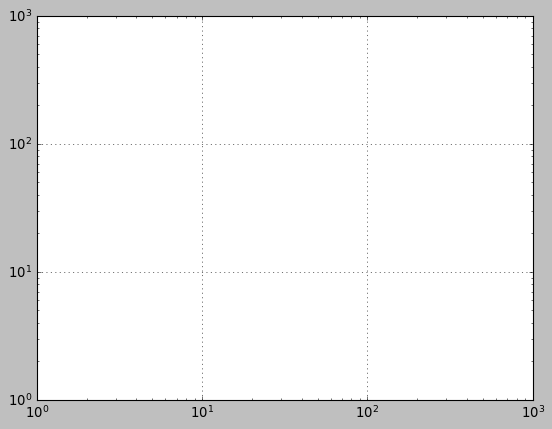

In [103]:
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);

In this chart each major tick shows a large tickmark, label, and gridline, while each minor tick shows a smaller tickmark with no label or gridline.

These tick properties—locations and labels, that is—can be customized by setting the `formatter` and `locator` objects of each axis. Let's examine these for the x-axis of the just-shown plot:

In [104]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [105]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a `LogLocator` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a `NullFormatter`: this says that no labels will be shown.

We'll now look at a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using `plt.NullLocator` and `plt.NullFormatter`, as shown here (see the following figure):

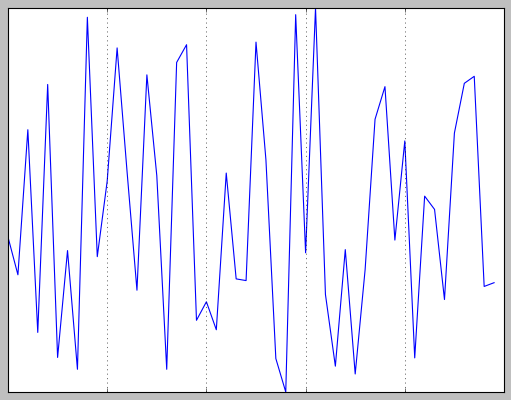

In [106]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

We've removed the labels (but kept the ticks/gridlines) from the x-axis, and removed the ticks (and thus the labels and gridlines as well) from the y-axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/jimp/scikit_learn_data


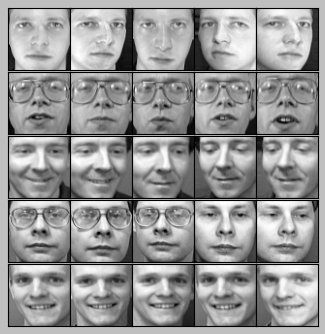

In [107]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')

Each image is shown in its own axes, and we've set the tick locators to null because the tick values (pixel numbers in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here (see the following figure):

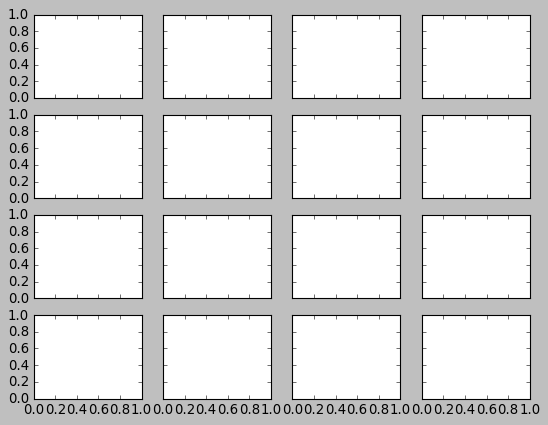

In [108]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x-axis ticks, the numbers nearly overlap, making them quite difficult to decipher.
One way to adjust this is with `plt.MaxNLocator`, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations (see the following figure):

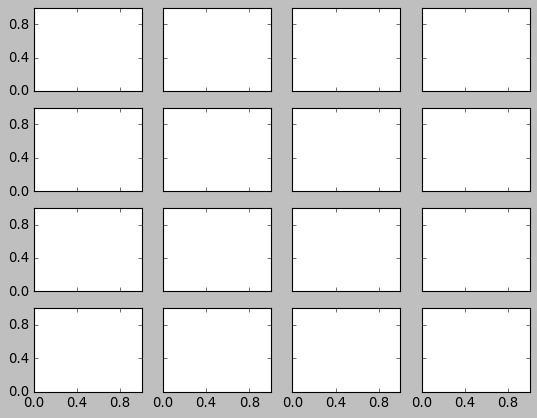

In [109]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly spaced ticks, you might also use `plt.MultipleLocator`, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like to do something different.
Consider this plot of a sine and a cosine curve (see the following figure):

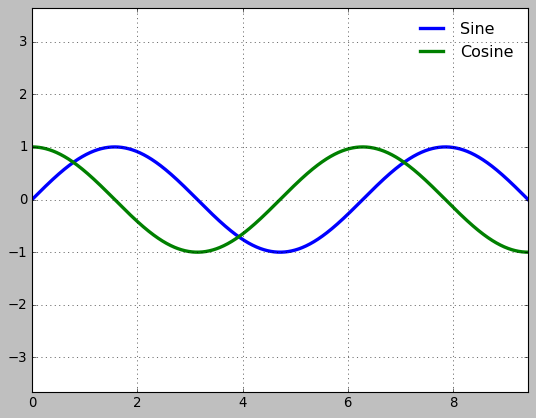

In [110]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple of changes we might like to make here. First, it's more natural for this data to space the ticks and gridlines in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the number we provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/2$ and $\pi/4$ (see the following figure):

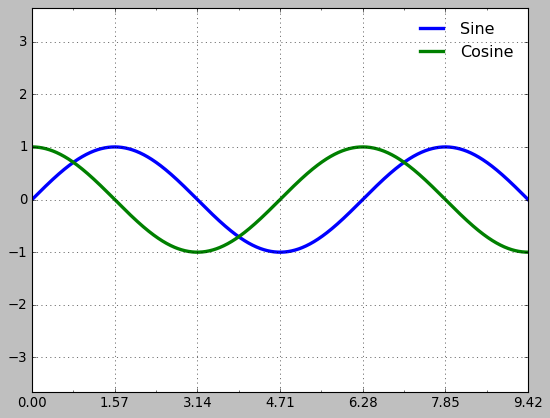

In [111]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use `plt.FuncFormatter`, which accepts a user-defined function giving fine-grained control over the tick outputs (see the following figure):

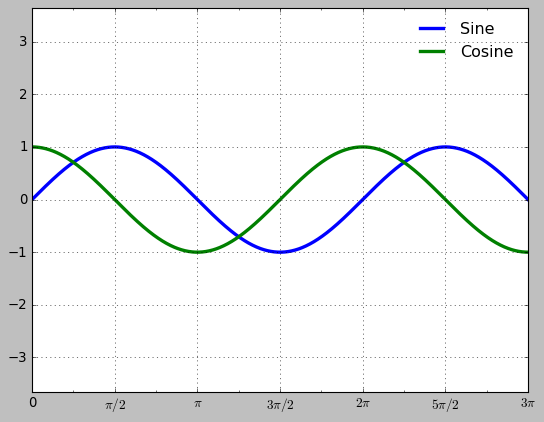

In [112]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, `"$\pi$"` is rendered as the Greek character $\pi$.

## Summary of Formatters and Locators

We've seen a couple of the available formatters and locators; I'll conclude this chapter by briefly listing all of the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentation.
Each of the following is available in the `plt` namespace:

Locator class      | Description
-------------------|-------------
`NullLocator`      | No ticks
`FixedLocator`     | Tick locations are fixed
`IndexLocator`     | Locator for index plots (e.g., where `x = range(len(y)))`
`LinearLocator`    | Evenly spaced ticks from min to max
`LogLocator`       | Logarithmically spaced ticks from min to max
`MultipleLocator`  | Ticks and range are a multiple of base
`MaxNLocator`      | Finds up to a max number of ticks at nice locations
`AutoLocator`      | (Default) `MaxNLocator` with simple defaults
`AutoMinorLocator` | Locator for minor ticks

Formatter class     | Description
--------------------|---------------
`NullFormatter`     | No labels on the ticks
`IndexFormatter`    | Set the strings from a list of labels
`FixedFormatter`    | Set the strings manually for the labels
`FuncFormatter`     | User-defined function sets the labels
`FormatStrFormatter`| Use a format string for each value
`ScalarFormatter`   | Default formatter for scalar values
`LogFormatter`      | Default formatter for log axes

We'll see further examples of these throughout the remainder of the book.

# Customizing Matplotlib: Configurations and Stylesheets

While many of the topics covered in previous chapters involve adjusting the style of plot elements one by one, Matplotlib also offers mechanisms to adjust the overall style of a chart all at once. In this chapter we'll walk through some of Matplotlib's runtime configuration (*rc*) options, and take a look at the *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Throughout this part of the book, you've seen how it is possible to tweak individual plot settings to end up with something that looks a little nicer than the default.
It's also possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram, shown in the following figure:

In [113]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

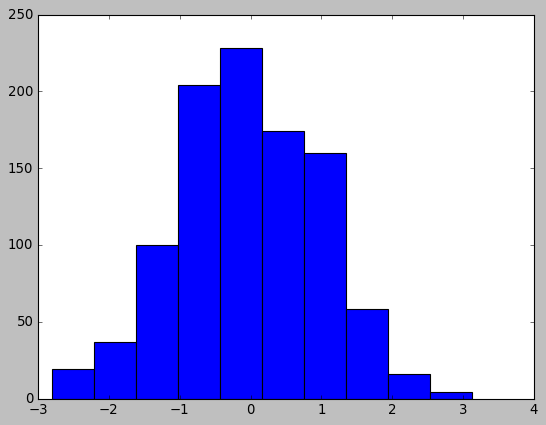

In [114]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot, as you can see in the following figure:

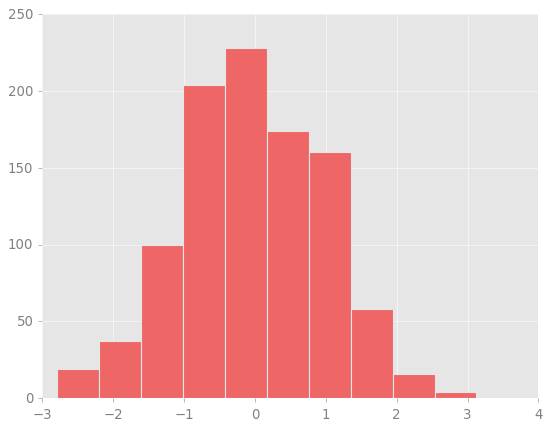

In [115]:
# use a gray background
fig = plt.figure(facecolor='white')
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white gridlines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by that of the R language's `ggplot` visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the `plt.rc` convenience routine.
Let's see how we can modify the rc parameters so that our default plot will look similar to what we did before.

We can use the `plt.rc` function to change some of these settings:

In [116]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action (see the following figure):

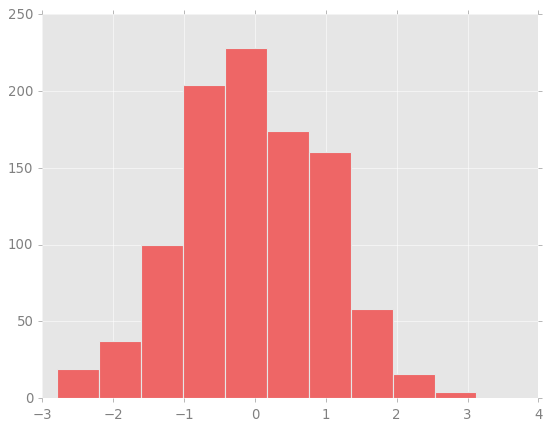

In [117]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters (see the following figure):

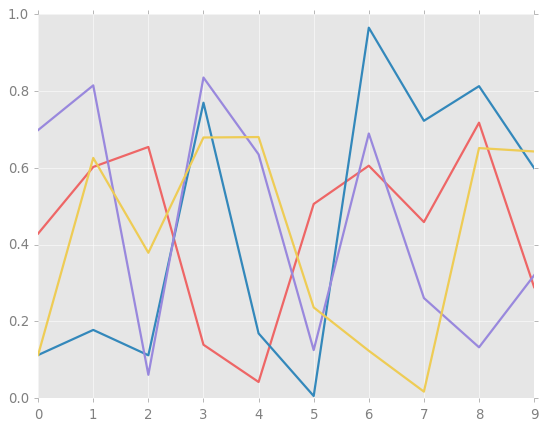

In [118]:
for i in range(4):
    plt.plot(np.random.rand(10))

For charts viewed onscreen rather than printed, I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
Optionally, these settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

## Stylesheets

A newer mechanism for adjusting overall chart styles is via Matplotlib's `style` module, which includes a number of default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't go as far as creating your own style, you may find what you're looking for in the built-in stylesheets.
`plt.style.available` contains a list of the available styles—here I'll list only the first five for brevity:

In [119]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

The standard way to switch to a stylesheet is to call `style.use`:

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the Python session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


To demonstrate these styles, let's create a function that will make two basic types of plot:

In [120]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default Style

Matplotlib's `default` style was updated in the version 2.0 release; let's look at this first (see the following figure):

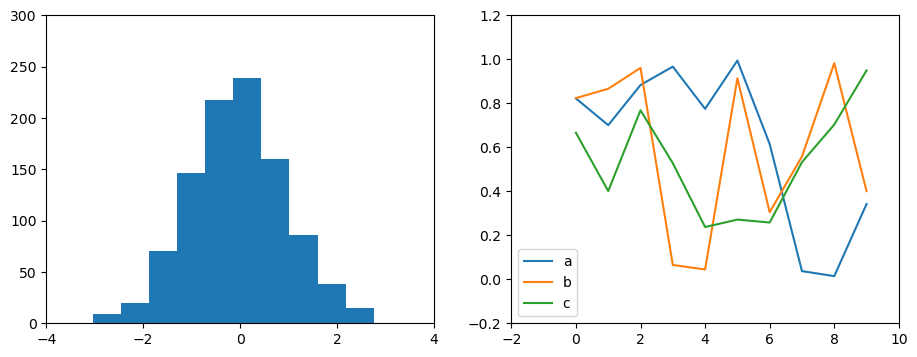

In [121]:
with plt.style.context('default'):
    hist_and_lines()

### FiveThiryEight Style

The `fivethirtyeight` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see in the following figure, it is typified by bold colors, thick lines, and transparent axes:

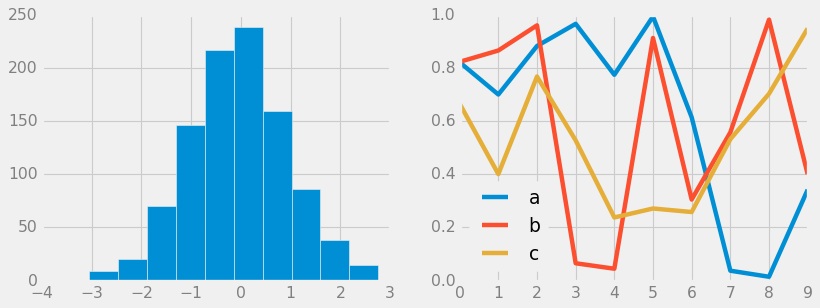

In [122]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot Style

The `ggplot` package in the R language is a popular visualization tool among data scientists.
Matplotlib's `ggplot` style mimics the default styles from that package (see the following figure):

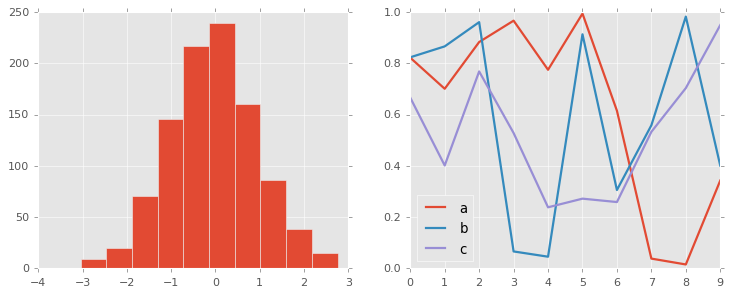

In [123]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers Style

There is a neat short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) by Cameron Davidson-Pilon that features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet (see the following figure):

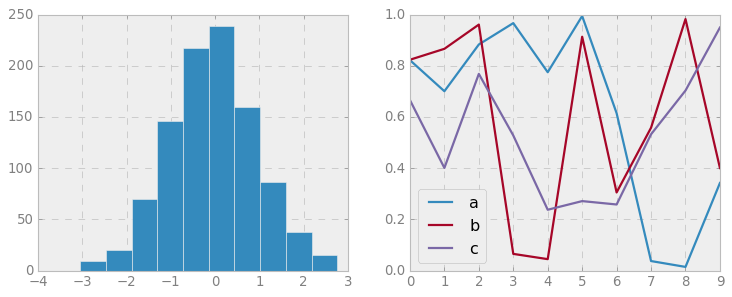

In [124]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark Background Style

For figures used within presentations, it is often useful to have a dark rather than light background.
The `dark_background` style provides this (see the following figure):

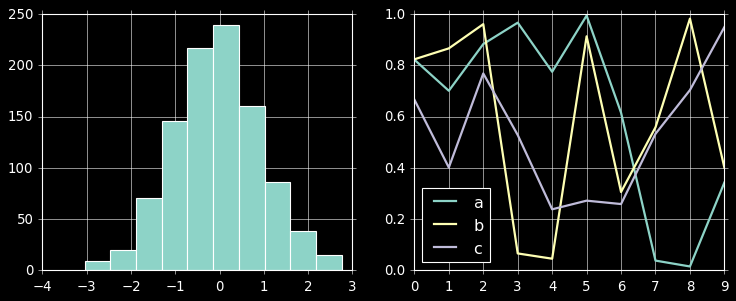

In [125]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale Style

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the `grayscale` style (see the following figure) can be useful:

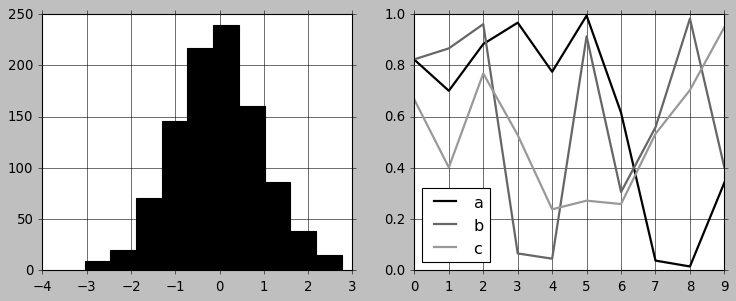

In [126]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn Style

Matplotlib also has several stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration (see the following figure):

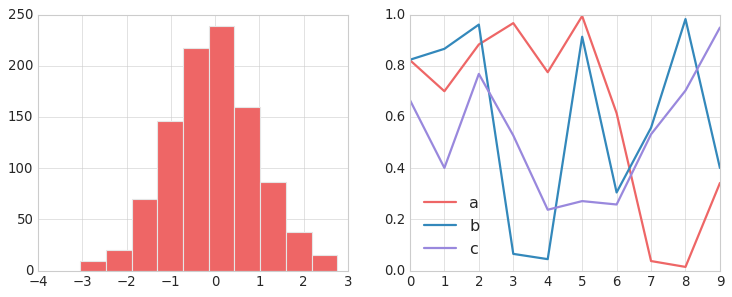

In [127]:
with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()

Take some time to explore the built-in options and find one that appeals to you!
Throughout this book, I will generally use one or more of these style conventions when creating plots.

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
Three-dimensional plots are enabled by importing the `mplot3d` toolkit, included with the main Matplotlib installation:

In [128]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines, as shown here (see the following figure):

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

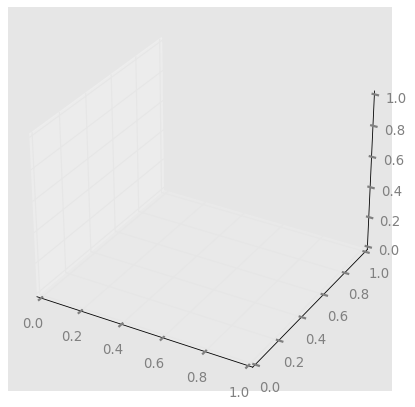

In [130]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically, in the notebook; recall that to use interactive figures, you can use `%matplotlib notebook` rather than `%matplotlib inline` when running this code.

## Three-Dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plots created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line (see the following figure):

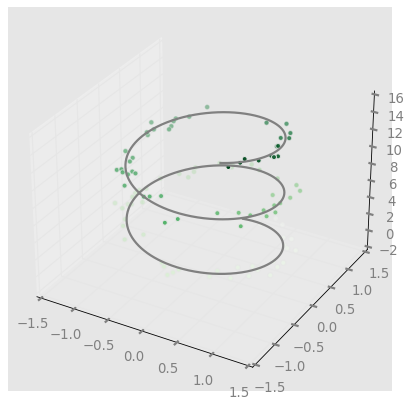

In [131]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-Dimensional Contour Plots

Analogous to the contour plots we explored in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb), `mplot3d` contains tools to create three-dimensional relief plots using the same inputs.
Like `ax.contour`, `ax.contour3D` requires all the input data to be in the form of two-dimensional regular grids, with the *z* data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function (see the following figure):

In [132]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

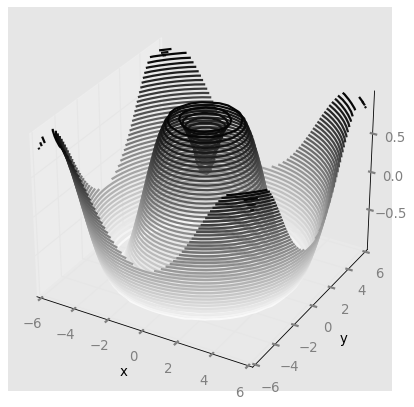

In [133]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the `view_init` method to set the elevation and azimuthal angles. In the following example, visualized in the following figure, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

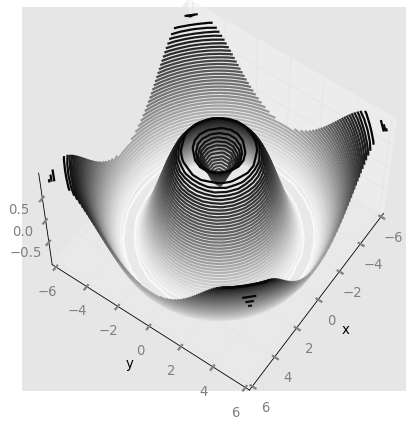

In [134]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe (see the following figure):

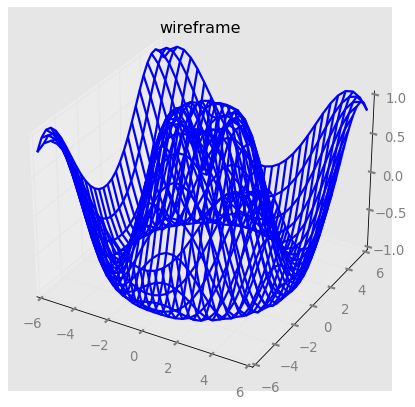

In [135]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized, as you can see in the following figure:

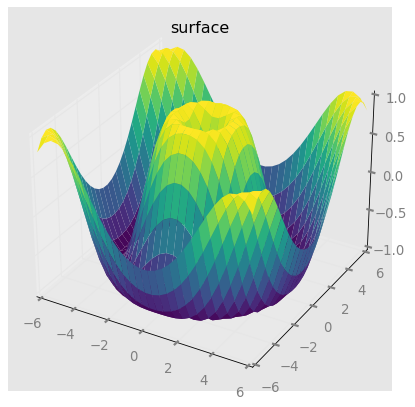

In [136]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the `surface3D` plot can give us a slice into the function we're visualizing (see the following figure):

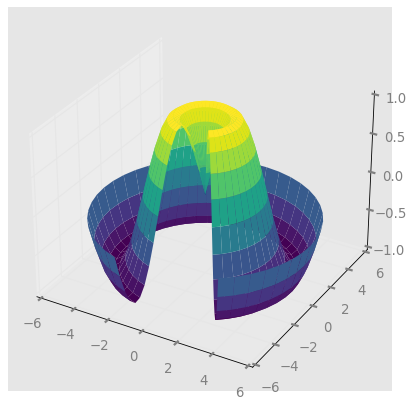

In [137]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

For some applications, the evenly sampled grids required by the preceding routines are too restrictive.
In these situations, triangulation-based plots can come in handy.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [138]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from, as shown in the following figure:

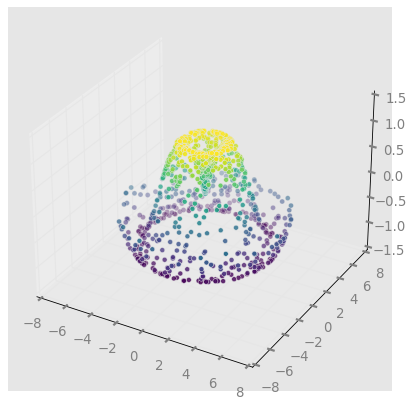

In [139]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

This point cloud leaves a lot to be desired.
The function that will help us in this case is `ax.plot_trisurf`, which creates a surface by first finding a set of triangles formed between adjacent points (remember that `x`, `y`, and `z` here are one-dimensional arrays); the following figure shows the result:

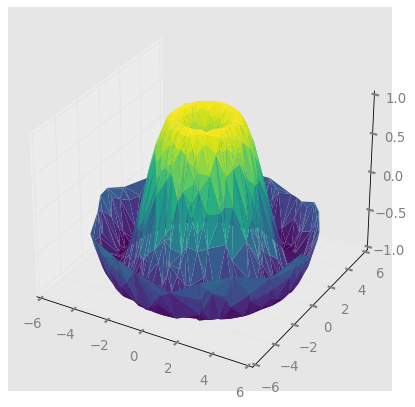

In [140]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

## Example: Visualizing a Möbius Strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist, resulting in an object with only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about its parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$, which ranges from –1 to 1 across the width of the strip:

In [141]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the (*x*, *y*, *z*) positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip make half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$:

In [142]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [143]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows (see the following figure):

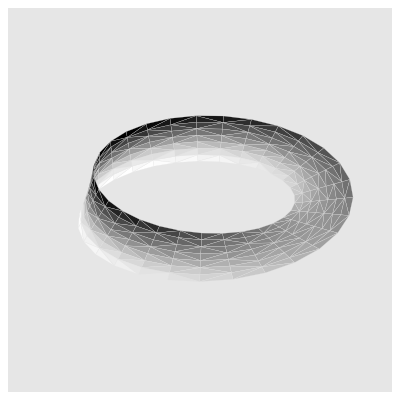

In [144]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='Greys', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.axis('off');

Combining all of these techniques, it is possible to create and display a wide variety of three-dimensional objects and patterns in Matplotlib.

# Visualization with Seaborn

Matplotlib has been at the core of scientific visualization in Python for decades, but even avid users will admit it often leaves much to be desired.
There are several complaints about Matplotlib that often come up:

- A common early complaint, which is now outdated: prior to version 2.0, Matplotlib's color and style defaults were at times poor and looked dated.
- Matplotlib's API is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas `DataFrame` objects. In order to visualize data from a `DataFrame`, you must extract each `Series` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the `DataFrame` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas.

To be fair, the Matplotlib team has adapted to the changing landscape: it added the `plt.style` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and Matplotlib is starting to handle Pandas data more seamlessly.
But for all the reasons just discussed, Seaborn remains a useful add-on.

By convention, Seaborn is often imported as `sns`:

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histograms, KDE, and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib (see the following figure):

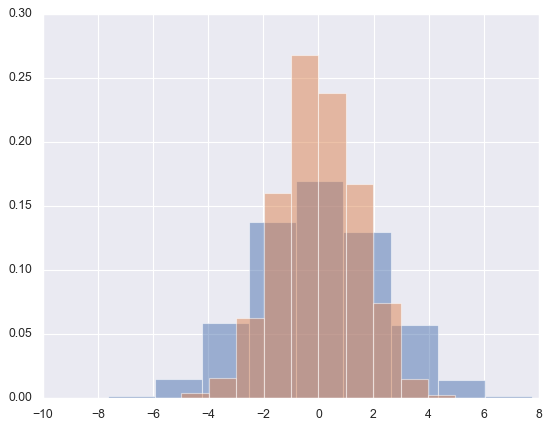

In [146]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than just providing a histogram as a visual output, we can get a smooth estimate of the distribution using kernel density estimation (introduced in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)), which Seaborn does with ``sns.kdeplot`` (see the following figure):

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/2427864141.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade=True);
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-li

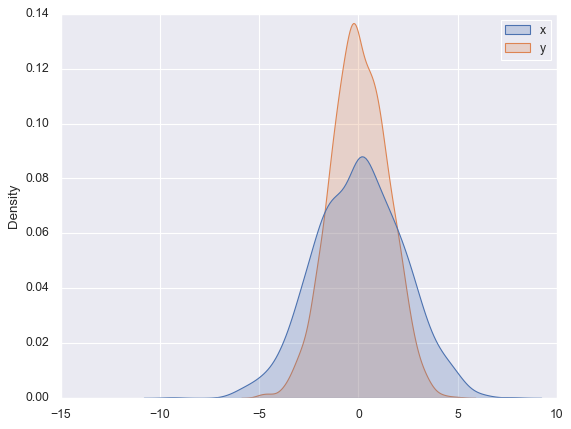

In [147]:
sns.kdeplot(data=data, shade=True);

If we pass `x` and `y` columns to `kdeplot`, we instead get a two-dimensional visualization of the joint density (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


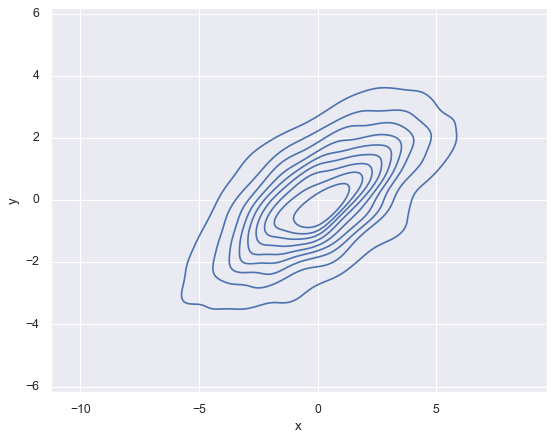

In [148]:
sns.kdeplot(data=data, x='x', y='y');

We can see the joint distribution and the marginal distributions together using `sns.jointplot`, which we'll explore further later in this chapter.

### Pair Plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. These are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three Iris species:

In [149]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot`` (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureW

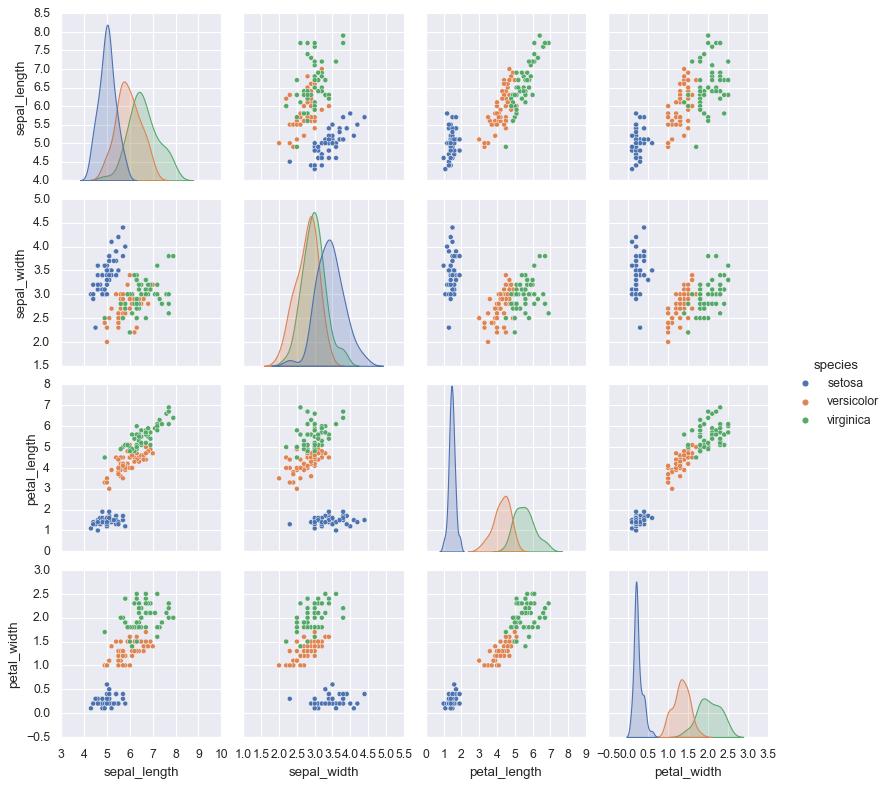

In [150]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets, as shown in the following figure. Seaborn's `FacetGrid` makes this simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:[^1]

[^1]: The restaurant staff data used in this section divides employees into two sexes: female and male. Biological sex
isn’t binary, but the following discussion and visualizations are limited by this data.

In [151]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


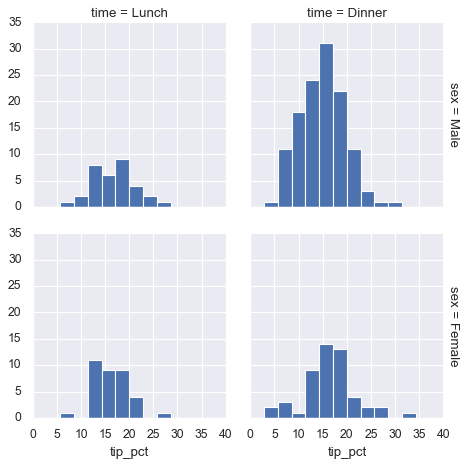

In [152]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

The faceted chart gives us some quick insights into the dataset: for example, we see that it contains far more data on male servers during the dinner hour than other categories, and typical tip amounts appear to range from approximately 10% to 20%, with some outliers on either end.

### Categorical Plots

Categorical plots can be useful for this kind of visualization as well. These allow you to view the distribution of a parameter within bins defined by any other parameter, as shown in the following figure:

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


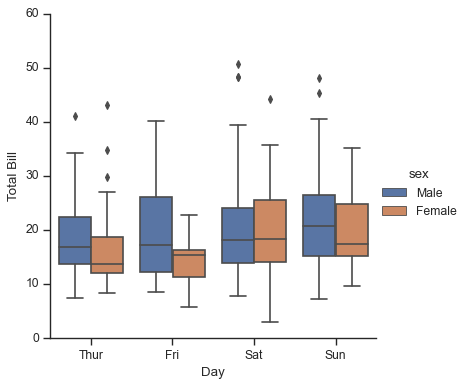

In [153]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint Distributions

Similar to the pair plot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


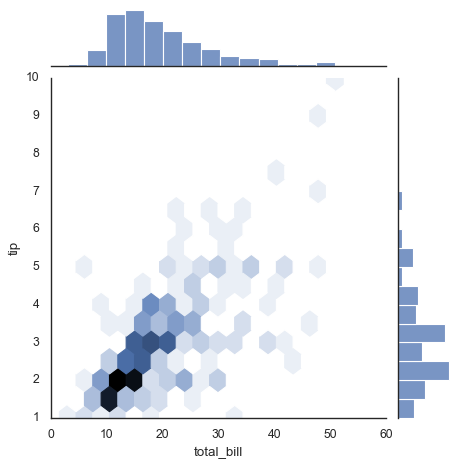

In [154]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression, as shown in the following figure:

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


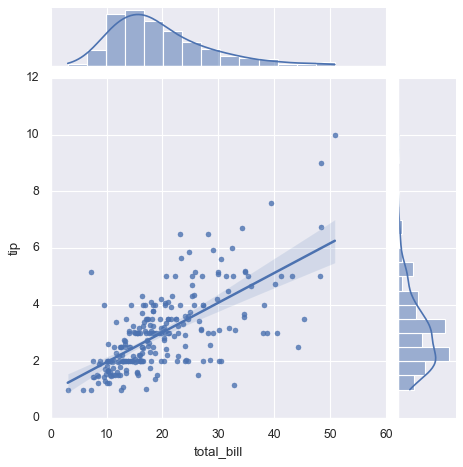

In [155]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar Plots

Time series can be plotted using `sns.factorplot`. In the following example, we'll use the Planets dataset that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb); see the following figure for the result:

In [156]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


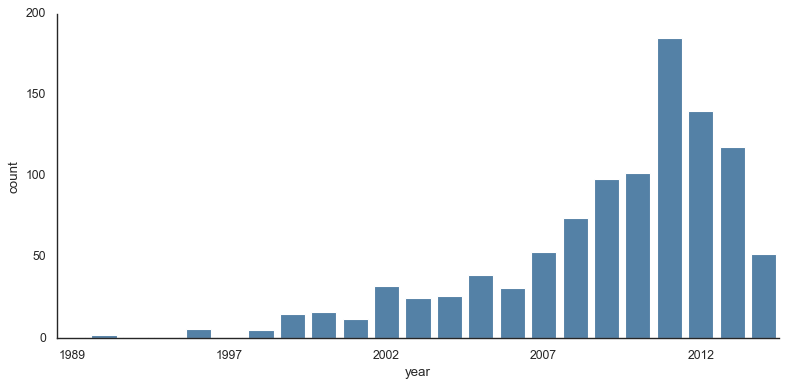

In [157]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


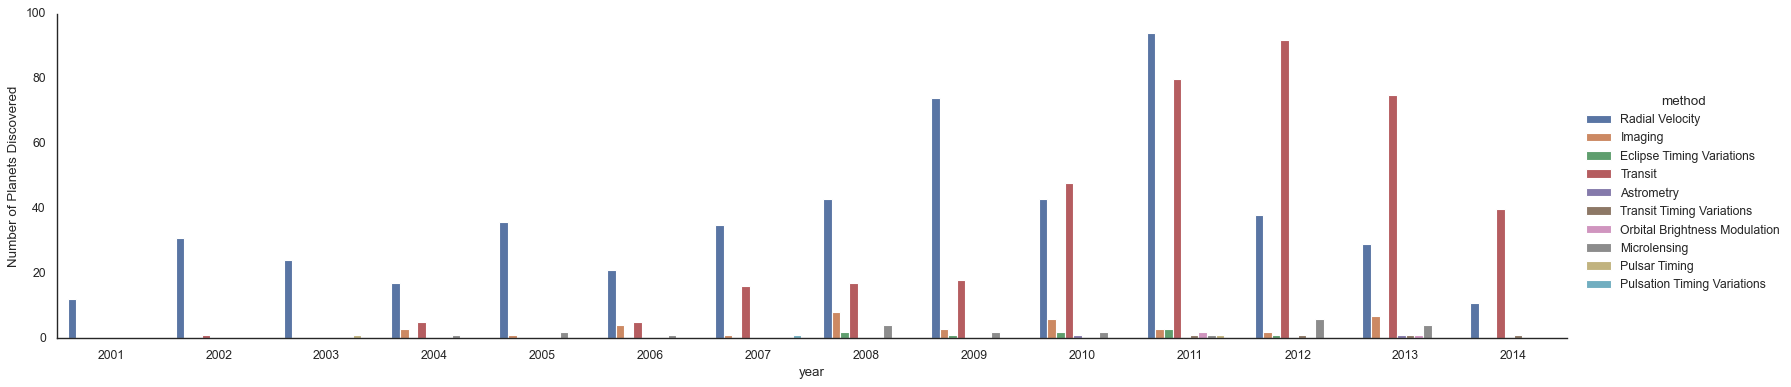

In [158]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), and particularly the [example gallery](https://seaborn.pydata.org/examples/index.html).

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
I've scraped the data from sources on the web, aggregated it and removed any identifying information, and put it on GitHub, where it can be downloaded
(if you are interested in using Python for web scraping, I would recommend [*Web Scraping with Python*](http://shop.oreilly.com/product/0636920034391.do) by Ryan Mitchell, also from O'Reilly).
We will start by downloading the data and loading it into Pandas:[^2]

[^2]: The marathon data used in this section divides runners into two genders: men and women. While gender is a
spectrum, the following discussion and visualizations use this binary because they depend on the data.

In [159]:
# url = ('https://raw.githubusercontent.com/jakevdp/'
#        'marathon-data/master/marathon-data.csv')
# !cd data && curl -O {url}

In [161]:
data = pd.read_csv('./data/marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

Notice that Pandas loaded the time columns as Python strings (type `object`); we can see this by looking at the `dtypes` attribute of the `DataFrame`:

In [162]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [163]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

age gender           split           final
0   33      M 0 days 01:05:38 0 days 02:08:51
1   32      M 0 days 01:06:26 0 days 02:09:28
2   31      M 0 days 01:06:49 0 days 02:10:42
3   38      M 0 days 01:06:16 0 days 02:13:45
4   31      M 0 days 01:06:32 0 days 02:13:59

In [164]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

That will make it easier to manipulate the temporal data. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [165]:
data['split_sec'] = data['split'].view(int) / 1E9
data['final_sec'] = data['final'].view(int) / 1E9
data.head()

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1313223546.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data['split_sec'] = data['split'].view(int) / 1E9
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1313223546.py:2: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data['final_sec'] = data['final'].view(int) / 1E9


age gender           split           final  split_sec  final_sec
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0

To get an idea of what the data looks like, we can plot a `jointplot` over the data; the following figure shows the result:

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


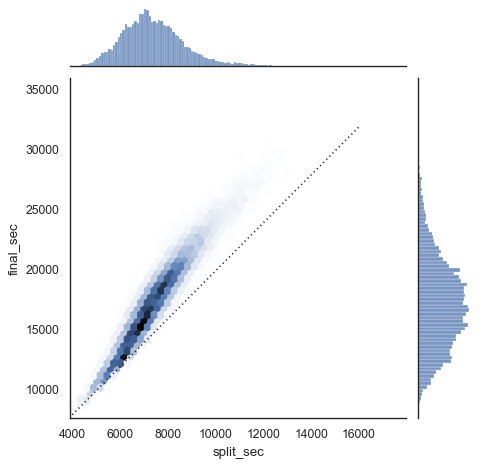

In [166]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [167]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  
0   -0.018756  
1   -0.026262  
2   -0.022443  
3    0.009097  
4    0.006842

Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


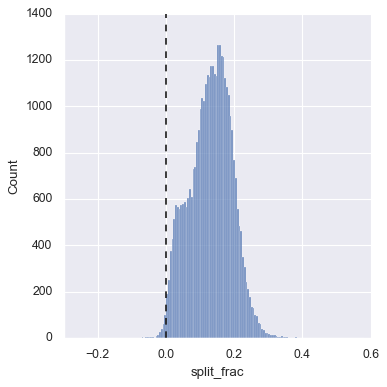

In [168]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--");

In [169]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a `PairGrid`, which draws plots of all these correlations (see the following figure):

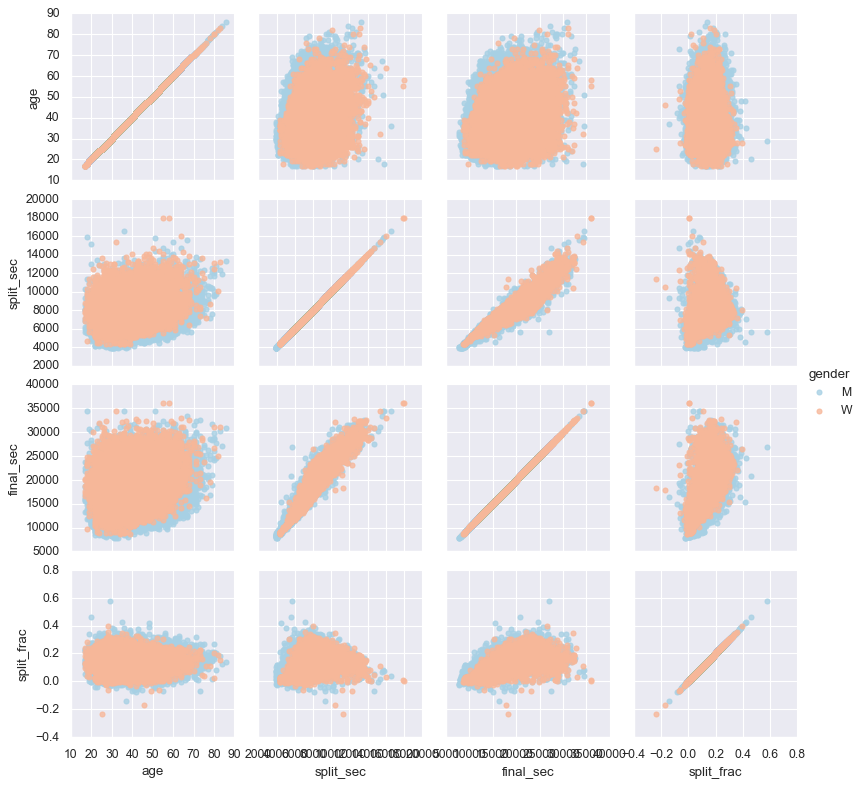

In [170]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. Let's zoom in on the histogram of split fractions separated by gender, shown in the following figure:

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1793497472.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_97665/1793497472.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_

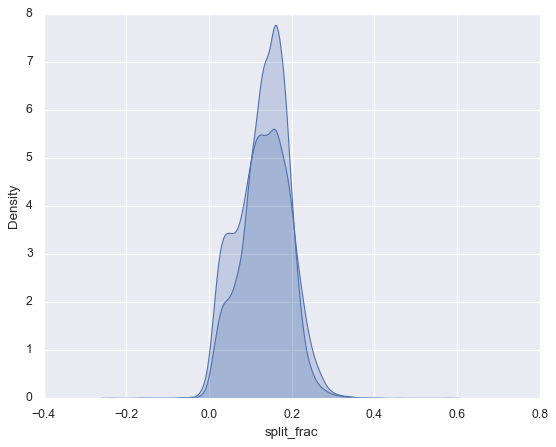

In [171]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
It almost looks like a bimodal distribution among the men and women. Let's see if we can suss out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*, shown in the following figure:

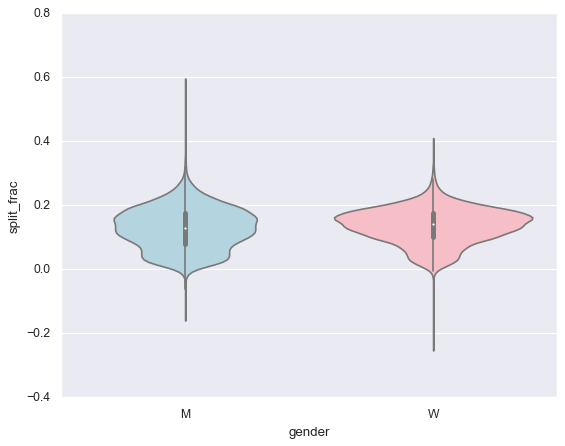

In [172]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Let's look a little deeper, and compare these violin plots as a function of age (see the following figure). We'll start by creating a new column in the array that specifies the age range that each person is in, by decade:

In [173]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  age_dec  
0   -0.018756       30  
1   -0.026262       30  
2   -0.022443       30  
3    0.009097       30  
4    0.006842       30

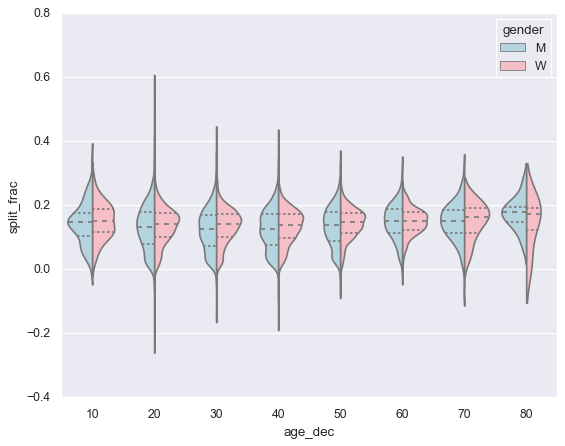

In [174]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

We can see where the distributions among men and women differ: the split distributions of men in their 20s to 50s show a pronounced overdensity toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, it appears that the 80-year-old women seem to outperform *everyone* in terms of their split time, although this is likely a small number effect, as there are only a handful of runners in that range:

In [175]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use `regplot`, which will automatically fit a linear regression model to the data (see the following figure):

/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jimp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


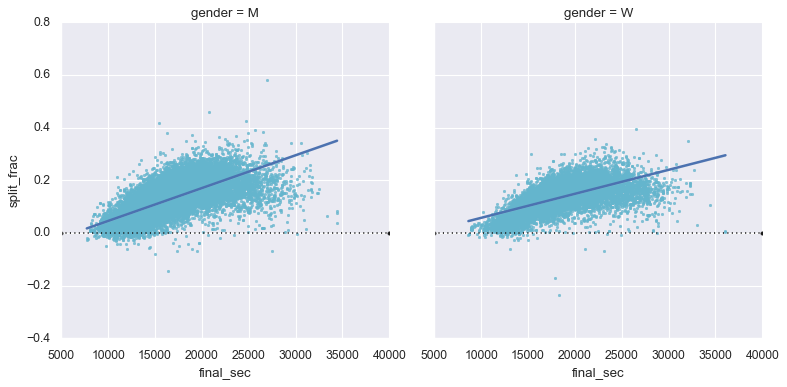

In [176]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color="k", ls=":");

Apparently, among both men and women, the people with fast splits tend to be faster runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

# Further Resources

A single part of a book can never hope to cover all the available features and plot types available in Matplotlib.
As with other packages we've seen, liberal use of IPython's tab completion and help functions (see [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)) can be very helpful when exploring Matplotlib's API.
In addition, Matplotlib’s [online documentation](http://matplotlib.org/) can be a helpful reference.
See in particular the [Matplotlib gallery](https://matplotlib.org/stable/gallery/), which shows thumbnails of hundreds of different plot types, each one linked to a page with the Python code snippet used to generate it.
This allows you to visually inspect and learn about a wide range of different plotting styles and visualization techniques.

For a book-length treatment of Matplotlib, I would recommend *Interactive Applications Using Matplotlib* (Packt), written by Matplotlib core developer Ben Root.

## Other Python Visualization Libraries

Although Matplotlib is the most prominent Python visualization library, there are other more modern tools that are worth exploring as well.
I'll mention a few of them briefly here:

- [Bokeh](http://bokeh.pydata.org) is a JavaScript visualization library with a Python frontend that creates highly interactive visualizations capable of handling very large and/or streaming datasets.
- [Plotly](http://plot.ly) is the eponymous open source product of the Plotly company, and is similar in spirit to Bokeh. It is actively developed and provides a wide range of interactive chart types.
- [HoloViews](https://holoviews.org/) is a more declarative, unified API for generating charts in a variety of backends, including Bokeh and Matplotlib.
- [Vega](https://vega.github.io/) and [Vega-Lite](https://vega.github.io/vega-lite) are declarative graphics representations, and are the product of years of research into how to think about data visualization and interaction. The reference rendering implementation is JavaScript, and the [Altair package](https://altair-viz.github.io/) provides a Python API to generate these charts.

The visualization landscape in the Python world is constantly evolving, and I expect that this list may be out of date by the time this book is published.
Additionally, because Python is used in so many domains, you'll find many other visualization tools built for more specific use cases.
It can be hard to keep track of all of them, but a good resource for learning about this wide variety of visualization tools is https://pyviz.org/, an open, community-driven site containing tutorials and examples of many different visualization tools.